# Лабораторная работа №2

## 1. Первый набор данных Forbes 2022 Billionaires data (Данные о миллиардерах Forbes за 2022 год)

Выгрузка данных из CSV файла в датафрейм



In [844]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загрузка данных
df = pd.read_csv("..//..//static//csv//Forbes Billionaires.csv")

# Вывод колонок
print(df.columns)

print()

df.info()

Index(['Rank ', 'Name', 'Networth', 'Age', 'Country', 'Source', 'Industry'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      2600 non-null   int64  
 1   Name      2600 non-null   object 
 2   Networth  2600 non-null   float64
 3   Age       2600 non-null   int64  
 4   Country   2600 non-null   object 
 5   Source    2600 non-null   object 
 6   Industry  2600 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 142.3+ KB


### Описание набора  
The World's Billionaires — ежегодный рейтинг самых богатых миллиардеров мира по документально подтвержденному состоянию, составляемый и публикуемый в марте каждого года американским деловым журналом Forbes. Общая чистая стоимость каждого человека в списке оценивается и указывается в долларах США на основе их документально подтвержденных активов с учетом задолженности и других факторов. Члены королевской семьи и диктаторы, чье богатство обусловлено их положением, исключены из этих списков. Этот рейтинг представляет собой индекс самых богатых документально подтвержденных лиц, исключая любой рейтинг тех, чье богатство не может быть полностью установлено.


In [845]:
# Вывод столбцов
df.head()

Rank                        Name  Networth  Age        Country  \
0      1                 Elon Musk      219.0   50  United States   
1      2                Jeff Bezos      171.0   58  United States   
2      3  Bernard Arnault & family      158.0   73         France   
3      4                Bill Gates      129.0   66  United States   
4      5            Warren Buffett      118.0   91  United States   

               Source                Industry  
0       Tesla, SpaceX             Automotive   
1              Amazon             Technology   
2                LVMH       Fashion & Retail   
3           Microsoft             Technology   
4  Berkshire Hathaway  Finance & Investments

In [846]:
# Краткая статистическая сводка для данных:
df.describe()

Rank      Networth          Age
count  2600.000000  2600.000000  2600.000000
mean   1269.570769     4.860750    64.271923
std     728.146364    10.659671    13.220607
min       1.000000     1.000000    19.000000
25%     637.000000     1.500000    55.000000
50%    1292.000000     2.400000    64.000000
75%    1929.000000     4.500000    74.000000
max    2578.000000   219.000000   100.000000

### Получение сведений о пропущенных данных

In [847]:
# Количество пустых значений признаков
print(df.isnull().sum())


Rank        0
Name        0
Networth    0
Age         0
Country     0
Source      0
Industry    0
dtype: int64


Нет пропущенных данных

### Анализ сведений о наборе данных

**Набор данных:** 

Набор данных представляет собой информацию о самых богатых миллиардерах мира. Их состоянии, стране, источнике богатсва, отрасль, в которой они работают. По этим данным будет проводиться анализ. 

**Проблемная область:**

Анализ данных из списка миллиардеров Forbes позволяет не только понять текущее состояние богатства в мире, но и выявить более глубокие тенденции и паттерны, которые могут помочь в принятии бизнес-решений, понимании экономических процессов и определении направлений для дальнейших исследований. Эти данные могут быть основой для многочисленных статей, отчетов и аналитических исследований, что делает их ценными для широкого круга специалистов в различных областях.

**Анализ содержимого**

*Объекты наблюдения:* миллиардеры.

*Атрибуты объектов:* имя, величина богатства, возраст, страна, источник, индустрия

*Связи между объектами:* 
 1) Зависимость между возрастом миллиардера и его состоянием. 
 2) В каких странах наибольшее количество миллиардеров и насколько их состояние велико по сравнению с другими странами.
 3) Как источник богатства связан с определенными индустриями. 
 4) В каких странах преобладают миллиардеры из определенных отраслей. 
 5) Могут ли более молодые миллиардеры быть более склонными к успеху в определенных индустриях (например, технологии), а более старшие миллиардеры — в традиционных отраслях (например, финансы).




### Бизнес-цель
1.  Концентрация и география богатства

    **Цель:** Выявить страны с наибольшим количеством миллиардеров и наибольшей концентрацией богатства для оценки экономической стабильности и перспектив для инвестиций в эти регионы.

    **Эффект:** Выбор стратегических регионов для выхода на рынок или расширения бизнеса. Повышение вероятности успешной экспансии за счет инвестиций в страны с наиболее стабильной экономической ситуацией и высоким уровнем благосостояния.

2.  Возрастные и демографические характеристики миллиардной элиты

    **Цель:** Проанализировать возрастные и демографические характеристики миллиардеров, чтобы выявить общие черты, такие как средний возраст успешных предпринимателей, страны происхождения и индустрии, в которых они добились успеха.

    **Эффект:** Определение возрастных групп или регионов с наибольшей вероятностью для предпринимательского успеха. Возможность целенаправленного поиска бизнес-партнеров или инвесторов из этих регионов и возрастных групп.

### Техническая цель
1.  Концентрация и география богатства

    **Цель:** Построить аналитическую модель для оценки концентрации богатства по странам.

    **На вход модели подаются:** страна, количество миллиардеров, совокупное состояние миллиардеров в стране.

    **Целевые показатели:** Количество миллиардеров и общий объем состояния в стране.

2.  Возрастные и демографические характеристики миллиардной элиты

    **Цель:** Разработать модель для анализа возрастной и региональной структуры миллиардного состояния.

    **На вход подаются:** возраст, страна, индустрия, размер состояния.

    **Целевые показатели:** Средний возраст миллиардеров по странам и индустриям, распределение состояния по возрастным категориям.




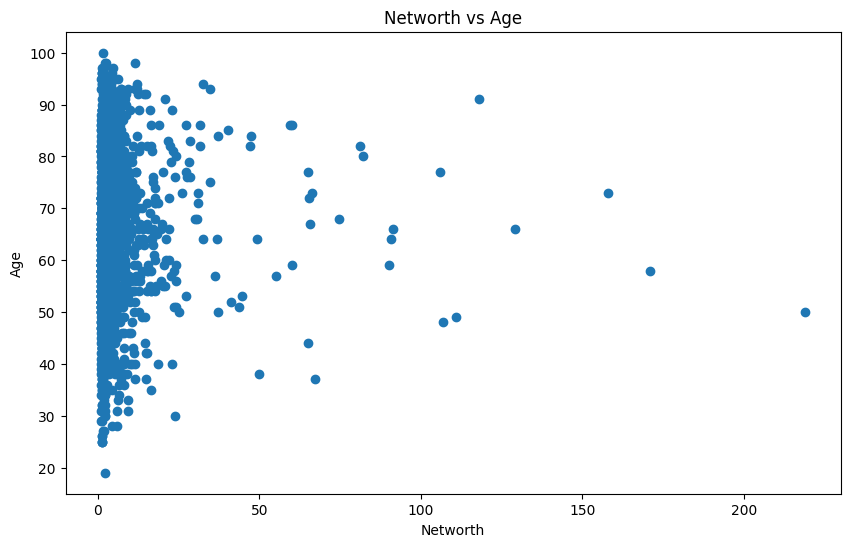

In [848]:
# Визуализируем отношение возраста и состояния
plt.figure(figsize=(10, 6))
plt.scatter(df["Networth"], df["Age"])
plt.xlabel("Networth")
plt.ylabel("Age")
plt.title("Networth vs Age")
plt.show()

Данные показывают, что в группе миллиардеров нет прямой зависимости между возрастом и величиной состояния, но большинство людей с огромным состоянием (выше 100 миллиардов) — это исключения, а не правило.

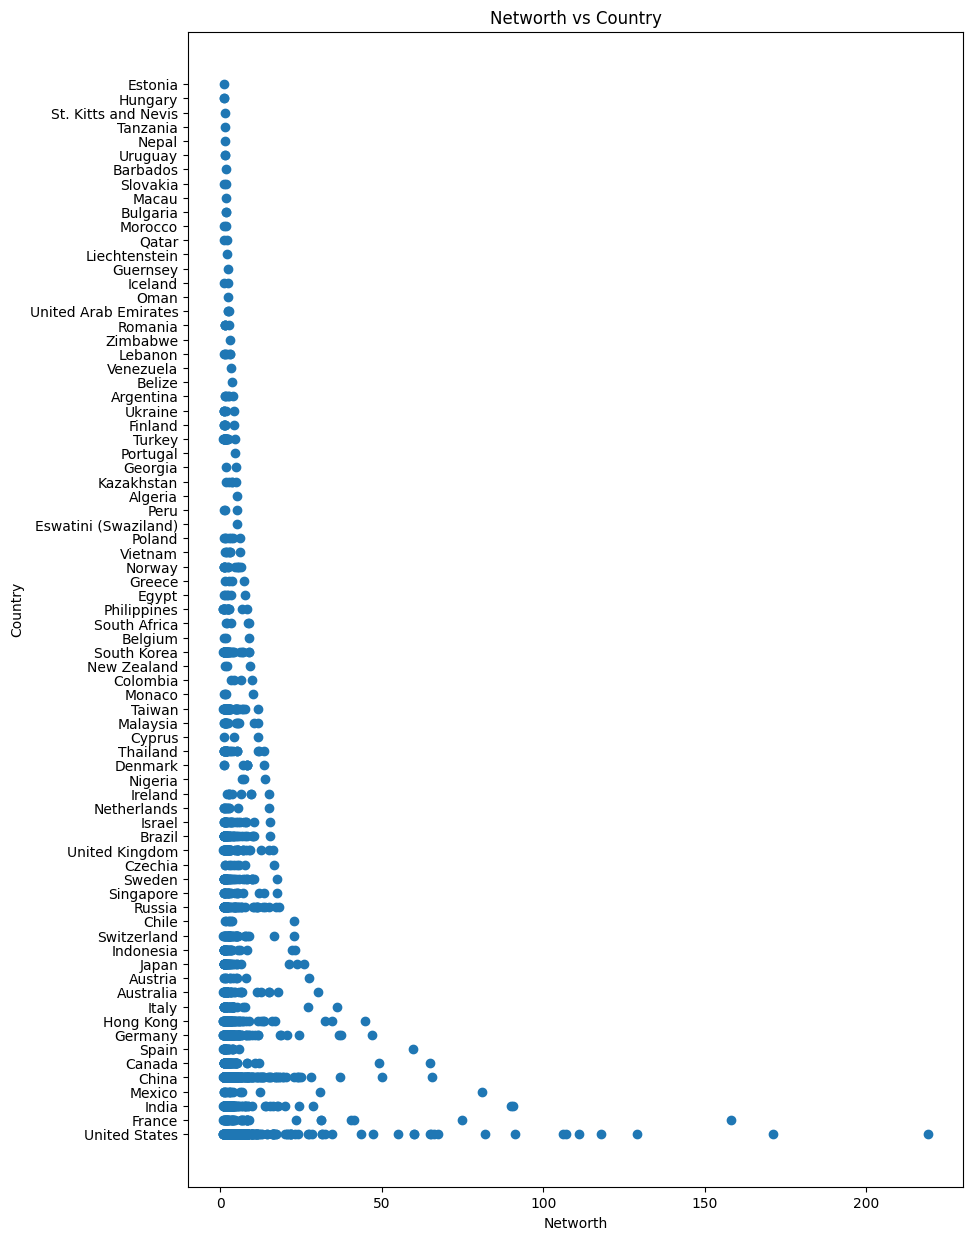

In [849]:
# Визуализируем отношение страны и состояния
plt.figure(figsize=(10, 15))
plt.scatter(df["Networth"], df["Country"])
plt.xlabel("Networth")
plt.ylabel("Country")
plt.title("Networth vs Country")
plt.show()

Эта диаграмма указывает на значительное неравенство в распределении состояния между странами, с явным доминированием США, Китая, Индии и нескольких других крупных экономик. Большинство других стран имеют гораздо меньше миллиардных состояний, и их концентрация богатства значительно ниже.

### Проблема выбранного набора данных  

**Зашумленность данных:**  
Если данные собирались из разных источников, возможно наличие некорректных значений, таких как неправильные оценки состояния, неверные возрастные данные или ошибки в указании стран и индустрий. Это может привести к ошибочным выводам.

**Смещение данных:** 
Набор данных может быть смещен в пользу определенных стран или индустрий. Например, список может включать больше американских миллиардеров или миллиардеров из технологической индустрии, что не отражает равномерно весь глобальный бизнес-контекст.

**Выбросы:**  
Супербогатые миллиардеры (например, с состоянием более 100 миллиардов) могут сильно выделяться и смещать средние значения, делая общие выводы менее репрезентативными для большинства людей в выборке. 

**Актуальность данных:**  
Если данные о состоянии миллиардеров собирались несколько лет назад, то они могут уже не быть актуальными. Изменения на рынках, политические события или пандемии могут значительно повлиять на текущее состояние бизнеса и богатство людей.

### Распределение признаков



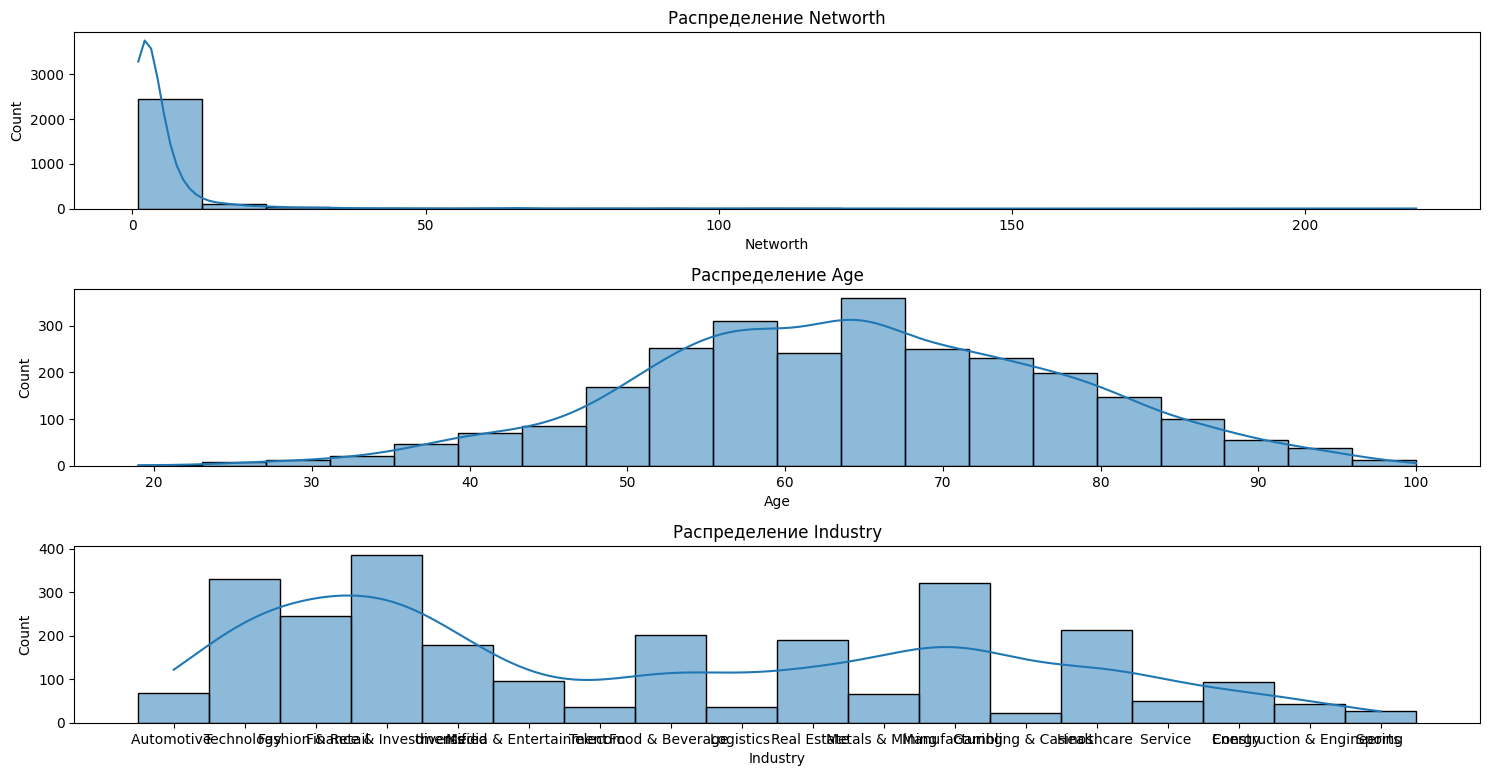

In [850]:
# Проверка распределения признаков
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Networth', 'Age', 'Industry'], 1):
    plt.subplot(4, 1, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f"Распределение {column}")
plt.tight_layout()
plt.show()

### Борьба с выбросами

Используем метод медианного абсолютного отклонения и удалим выбросы.

Этот метод особенно устойчив к выбросам, поскольку он основывается на медиане, а не на среднем значении, что делает его более подходящим для выявления выбросов в данных с асимметричным распределением.

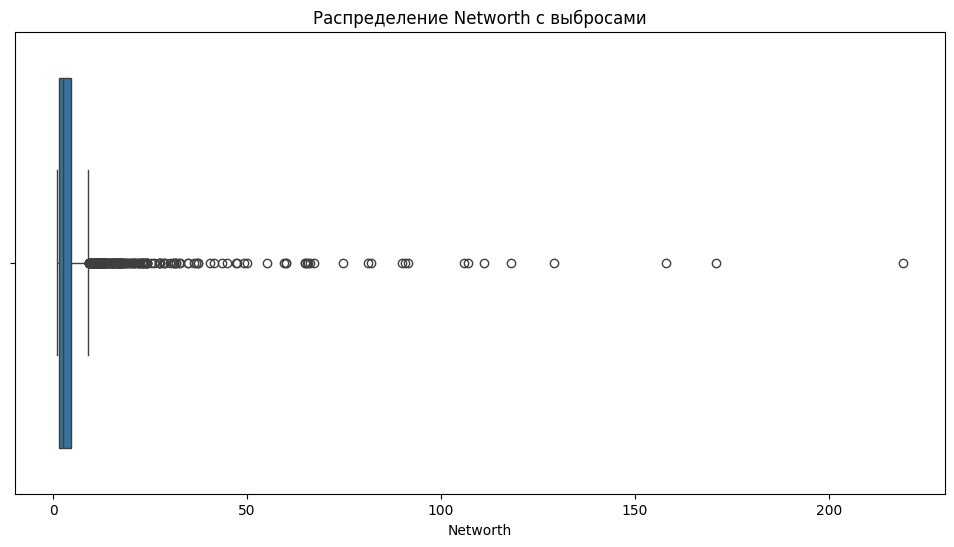

Количество выявленных выбросов: 508
Количество записей после удаления выбросов: 2092


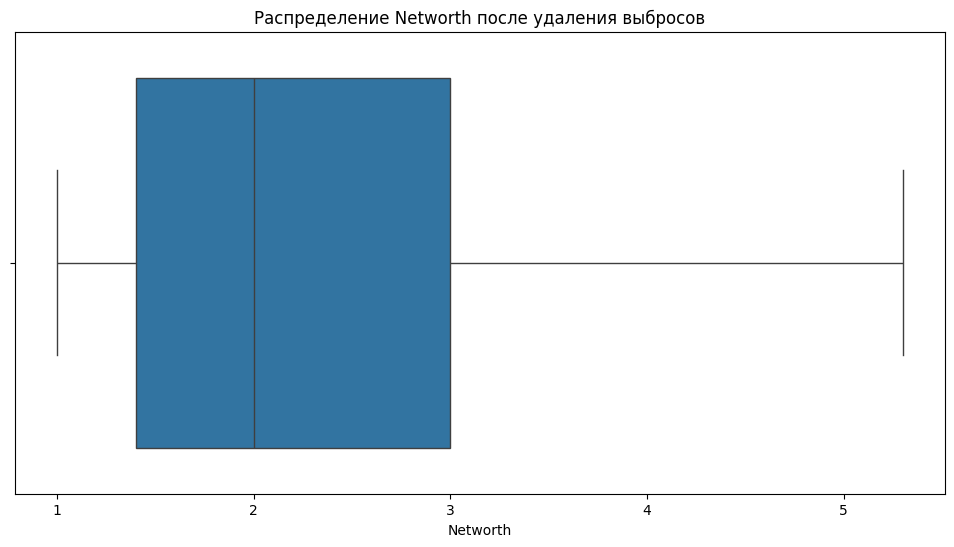

In [851]:
# Визуализация результатов
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Networth'])
plt.title('Распределение Networth с выбросами')
plt.show()

# Вычисление медианы для 'Networth'
median_price = df['Networth'].median()

# Вычисление абсолютных отклонений от медианы
df['absolute_deviation'] = np.abs(df['Networth'] - median_price)

# Вычисление медианного абсолютного отклонения (MAD)
mad = df['absolute_deviation'].median()

# Определение порога для выбросов. Вы можете настроить множитель в зависимости от ваших предпочтений
threshold = 3 * mad

# Выявление выбросов
outliers = df[df['absolute_deviation'] > threshold]

# Вывод количества найденных выбросов и оставшихся записей
print(f"Количество выявленных выбросов: {len(outliers)}")


# Удаление выбросов из набора данных
df = df[df['absolute_deviation'] <= threshold].drop(columns=['absolute_deviation'])


print(f"Количество записей после удаления выбросов: {len(df)}")

# Визуализация результатов
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Networth'])
plt.title('Распределение Networth после удаления выбросов')
plt.show()




### Разбиение датасета на три части: обучающую, контрольную и тестовую выборки

Обучающая выборка (training set): используется для обучения модели. Это основная часть данных, на которой модель обучается находить зависимости.

Валидационная выборка (validation set): используется для настройки гиперпараметров модели. Во время обучения модель проверяется на этой выборке, чтобы выбрать оптимальные параметры и избежать переобучения.

Тестовая выборка (test set): используется для окончательной проверки модели после завершения процесса обучения. Тестовые данные не используются в процессе обучения и позволяют объективно оценить качество модели.

In [852]:
from sklearn.model_selection import train_test_split

# Выделим признаки (все столбцы, кроме целевого, например "Networth") и целевой признак (например, "Networth")
X = df.drop(columns=["Networth"])  # Признаки (все столбцы, кроме целевого признака 'Networth')
y = df["Networth"]  # Целевая переменная (Networth)

# 1. Разделяем данные на обучающую (60%) и временную (40%) выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# 2. Разделяем временную выборку пополам на контрольную (20%) и тестовую (20%) выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Выводим размеры выборок
print(f"Размер обучающей выборки: {len(X_train)}")
print(f"Размер контрольной выборки: {len(X_val)}")
print(f"Размер тестовой выборки: {len(X_test)}")


Размер обучающей выборки: 1255
Размер контрольной выборки: 418
Размер тестовой выборки: 419


### Оценка сбалансированности выборок

Для оценки сбалансированности выборок можно проверить распределение целевой переменной (price) в каждой из них. Мы можем построить гистограммы или использовать базовую статистику, такую как среднее значение и стандартное отклонение, чтобы убедиться, что распределение price в обучающей, валидационной и тестовой выборках примерно одинаково.

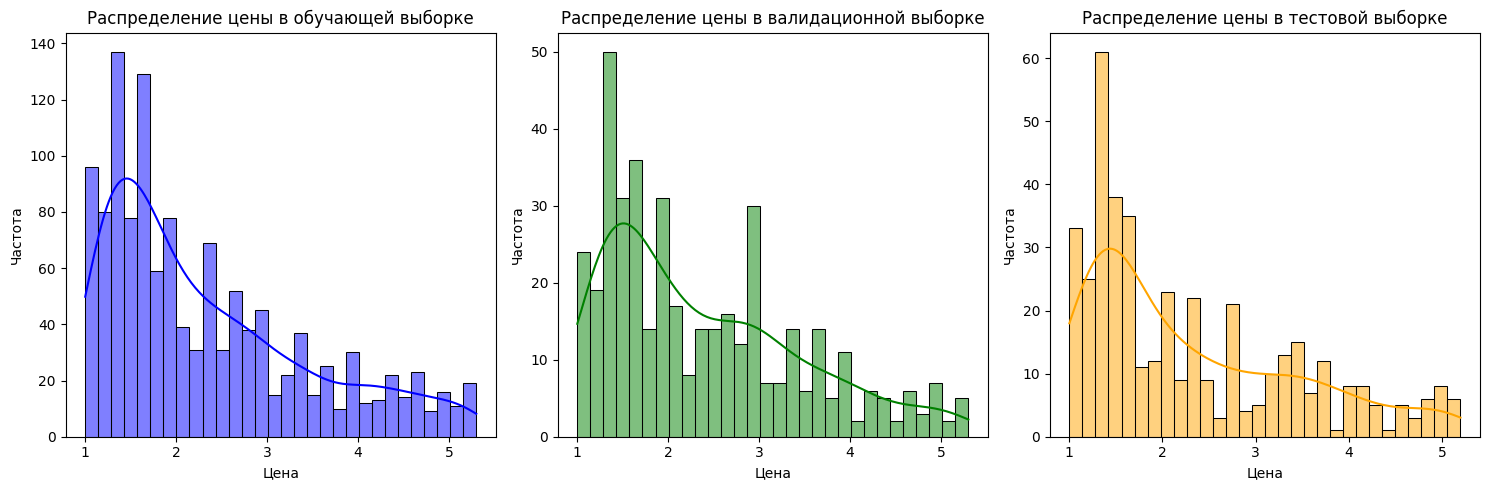

Статистика для обучающей выборки:
count    1255.000000
mean        2.334104
std         1.118726
min         1.000000
25%         1.500000
50%         2.000000
75%         3.000000
max         5.300000
Name: Networth, dtype: float64

Статистика для валидационной выборки:
count    418.000000
mean       2.381340
std        1.078073
min        1.000000
25%        1.500000
50%        2.100000
75%        3.000000
max        5.300000
Name: Networth, dtype: float64

Статистика для тестовой выборки:
count    419.000000
mean       2.308831
std        1.131241
min        1.000000
25%        1.400000
50%        1.900000
75%        3.100000
max        5.200000
Name: Networth, dtype: float64


In [853]:
# Визуализация распределения цены в каждой из выборок
plt.figure(figsize=(15, 5))

# Распределение в обучающей выборке
plt.subplot(1, 3, 1)
sns.histplot(y_train, bins=30, kde=True, color='blue')
plt.title("Распределение цены в обучающей выборке")
plt.xlabel("Цена")
plt.ylabel("Частота")

# Распределение в валидационной выборке
plt.subplot(1, 3, 2)
sns.histplot(y_val, bins=30, kde=True, color='green')
plt.title("Распределение цены в валидационной выборке")
plt.xlabel("Цена")
plt.ylabel("Частота")

# Распределение в тестовой выборке
plt.subplot(1, 3, 3)
sns.histplot(y_test, bins=30, kde=True, color='orange')
plt.title("Распределение цены в тестовой выборке")
plt.xlabel("Цена")
plt.ylabel("Частота")

plt.tight_layout()
plt.show()

# Вывод базовой статистики для каждой выборки
print("Статистика для обучающей выборки:")
print(y_train.describe())
print("\nСтатистика для валидационной выборки:")
print(y_val.describe())
print("\nСтатистика для тестовой выборки:")
print(y_test.describe())


Гистограммы и статистика показыают, что распределения в обучающей, валидационной и тестовой выборках схожи, а значит выборки можно считать сбалансированными.

### Борьба со смещением

Теперь оценим сбалансированность. Анализ проведём в категории 'Networth'.

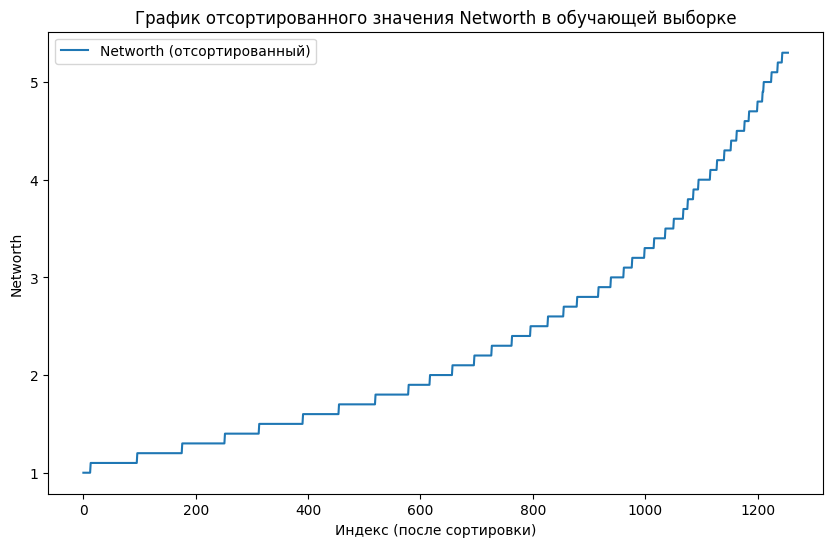

In [854]:
train_data = X_train.copy()
train_data["Networth"] = y_train  # Добавляем целевой признак

# Сортируем данные по возрастанию целевого признака 'Networth'
train_data_sorted = train_data.sort_values(by="Networth").reset_index(drop=True)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(train_data_sorted["Networth"], label="Networth (отсортированный)")
plt.title("График отсортированного значения Networth в обучающей выборке")
plt.xlabel("Индекс (после сортировки)")
plt.ylabel("Networth")
plt.legend()
plt.show()

По оценке сбалансированности данных сбалансированность умеренная.

## 2. Второй набор данных House Sales in King County, USA (Данные о продаже домов в округе Кинг, США)

Выгрузка данных из CSV файла в датафрейм


In [855]:
# Загрузка данных
df_houses = pd.read_csv("..//..//static//csv//kc house data.csv")

# Вывод
print(df_houses.columns)

print()

df_houses.info()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21

### Описание набора  
Этот набор данных содержит цены на продажу домов в округе Кинг, включая Сиэтл. Он включает дома, проданные в период с мая 2014 года по май 2015 года.

Это отличный набор данных для оценки простых регрессионных моделей.


In [856]:
# Вывод столбцов
df_houses.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [857]:
# Краткая статистическая сводка для данных:
df_houses.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

### Получение сведений о пропущенных данных

In [858]:
# Процент пропущенных значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f'{i} Процент пустых значений: %{null_rate:.2f}')

# Проверка на пропущенные данные
df.isnull().sum()

Rank        0
Name        0
Networth    0
Age         0
Country     0
Source      0
Industry    0
dtype: int64

Нет пропущенных данных

### Анализ сведений о наборе данных

**Набор данных:** 

Этот набор данных содержит цены на продажу домов в округе Кинг, включая Сиэтл. Он включает дома, проданные в период с мая 2014 года по май 2015 года.

**Проблемная область:**

Набор данных о продаже домов в округе Кинг предоставляет информацию для анализа факторов, влияющих на стоимость недвижимости. Проблемная область заключается в предсказании цены дома на основе различных факторов, таких как площадь, количество комнат, местоположение и состояние дома. Такой анализ важен для оценки стоимости недвижимости и выявления ключевых факторов, определяющих ее цену, что помогает в принятии обоснованных решений покупателям, продавцам и инвесторам.

**Анализ содержимого**

*Объекты наблюдения:* отдельные сделки по продаже домов.

*Атрибуты объектов:* 

id — уникальный идентификатор дома.  
date — дата продажи дома.   
price — цена продажи дома (целевая переменная).  
bedrooms — количество спален.  
bathrooms — количество ванных комнат.  
sqft_living — жилая площадь.  
sqft_lot — площадь участка.  
floors — количество этажей.  
waterfront — дом с видом на воду или без.  
view — индекс, отражающий качество вида.  
condition — состояние дома.  
grade — рейтинг строительного качества.  
sqft_above — площадь без подвала.  
sqft_basement — площадь подвала.  
yr_built — год постройки.  
yr_renovated — год последнего ремонта.  
zipcode — почтовый индекс.  
lat и long — географические координаты.  
sqft_living15 и sqft_lot15 — жилая площадь и площадь участка соседних 15 домов.


*Связи между объектами:* 
1) Расположение и цена: Связь между географическим положением (zipcode, lat, long) и ценой.
2) Площадь и цена: Зависимость цены от площади (sqft_living, sqft_lot).
3) Состояние и цена: Связь между состоянием дома (condition, grade) и его стоимостью.


### Бизнес-цель
1.  Определение факторов, наиболее влияющих на стоимость дома для оптимизации предложений покупателям и повышения рентабельности.

    **Цель:** Идентифицировать факторы (например, площадь, расположение, качество строительства), которые наиболее значительно влияют на цену дома.

    **Эффект:** Повышение точности оценок стоимости недвижимости, что помогает покупателям и продавцам формировать оптимальные цены.

2.  Оценка рыночных условий для определения стоимости ремонта и улучшений.

    **Цель:** Понять, какие улучшения (например, ремонт, увеличение жилой площади) могут повысить стоимость дома и насколько.

    **Эффект:** Информация может помочь владельцам недвижимости и инвесторам принимать решения о вложениях в улучшение недвижимости для увеличения ее рыночной стоимости.

### Техническая цель
1.  Техническая цель для определения факторов стоимости:

    Построить регрессионную модель для предсказания цены на основе всех доступных атрибутов.  
    На вход модели подаются: Все доступные признаки (например, sqft_living, grade, condition).  
    Целевой признак: price (цена продажи дома).  
    Эффект: Точный расчет цены на основе факторов, что повысит объективность оценки.  

2.  Техническая цель для анализа влияния улучшений на цену:

    Построить модели для анализа зависимости цены от показателей состояния, года постройки и года ремонта.  
    На вход модели подаются: признаки, такие как yr_built, yr_renovated, sqft_living, condition.  
    Целевой признак: price.  
    Эффект: Определение оптимальных вложений в улучшения и ремонт для повышения стоимости недвижимости.   




### Рассмотрим связь цены с другими признаками.  
1. Расположение и цена: Связь между географическим положением (zipcode, lat, long) и ценой.

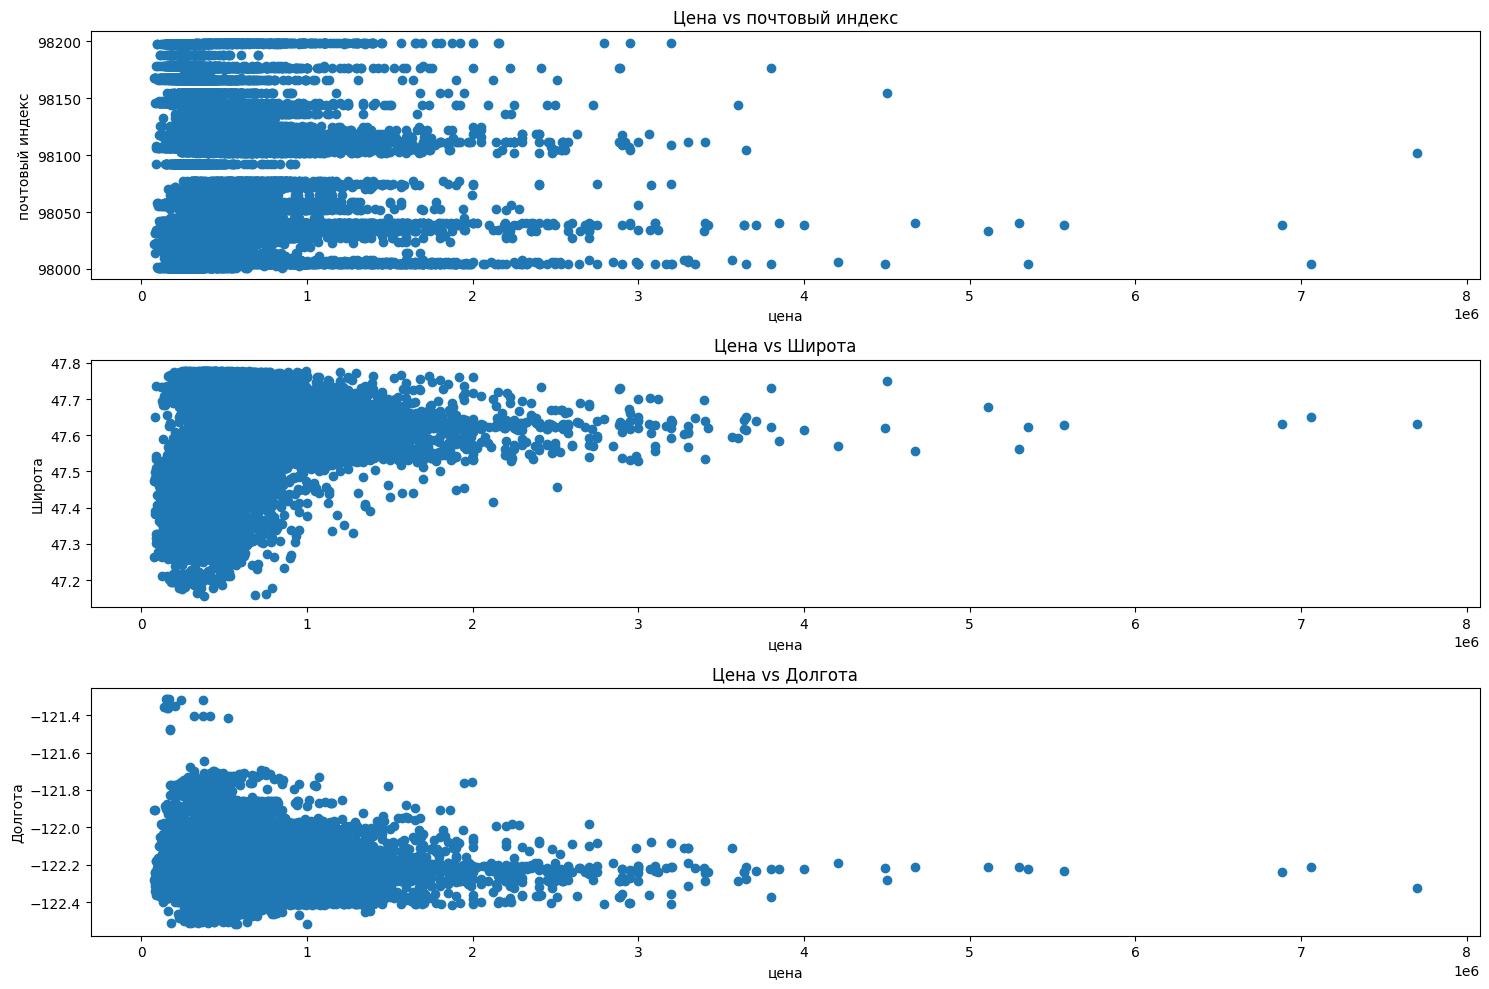

In [859]:
# Проверим, что нулевые значения удалены
plt.figure(figsize=(15, 10))

# Повторная визуализация распределений после удаления нулевых значений
plt.subplot(3, 1, 1)
plt.scatter(df_houses["price"], df_houses["zipcode"])
plt.xlabel("цена")
plt.ylabel("почтовый индекс")
plt.title("Цена vs почтовый индекс")

plt.subplot(3, 1, 2)
plt.scatter(df_houses["price"], df_houses["lat"])
plt.xlabel("цена")
plt.ylabel("Широта")
plt.title("Цена vs Широта")

plt.subplot(3, 1, 3)
plt.scatter(df_houses["price"], df_houses["long"])
plt.xlabel("цена")
plt.ylabel("Долгота")
plt.title("Цена vs Долгота")


plt.tight_layout()
plt.show()

Цена vs Почтовый индекс (zipcode): диаграмма не показывает явной корреляции между ценой и почтовым индексом. Почтовый индекс — это категориальный признак, который может включать множество уникальных значений. Он может вносить шум в модель, если не используется должным образом.

Цена vs Широта (lat): на графике видно, что дома с более высокой ценой сосредоточены в определённой зоне по широте. Это говорит о том, что широта может нести некоторую полезную информацию о расположении и влиянии на цену. Однако слишком широкое использование координат может добавить лишний шум, так как они не всегда напрямую связаны с качеством дома.

Цена vs Долгота (long): здесь также нет явной корреляции между долготой и ценой. Как и в случае с широтой, долгота может давать некоторую информацию, но её использование требует аккуратного подхода.

2. Площадь и цена: Зависимость цены от площади (sqft_living, sqft_lot).

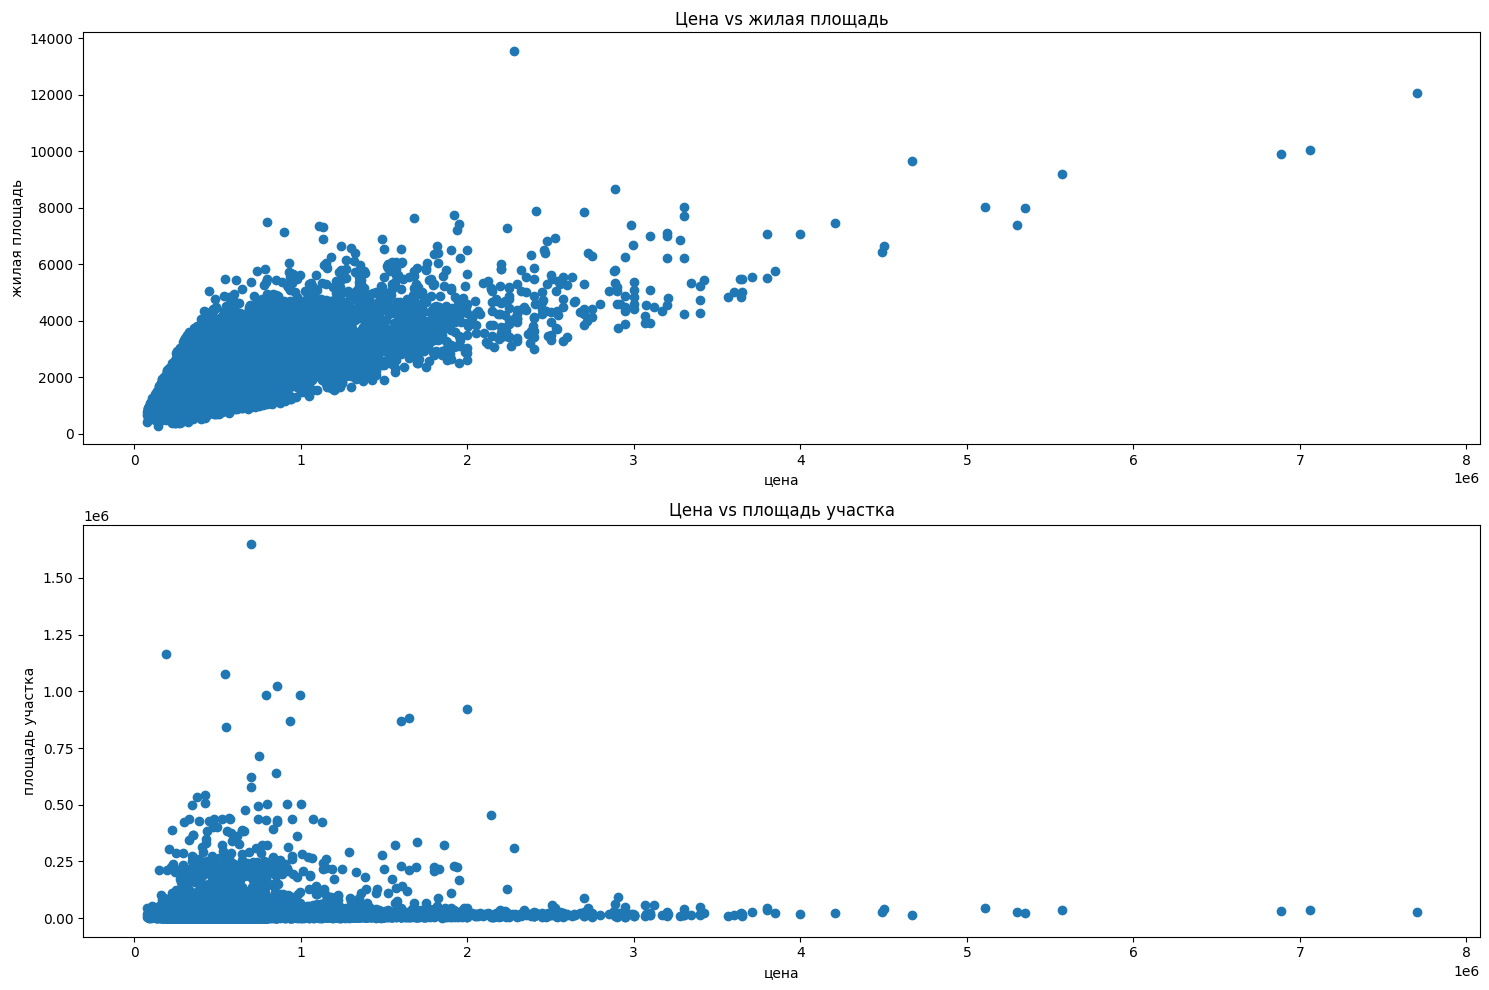

In [860]:
# Проверим, что нулевые значения удалены
plt.figure(figsize=(15, 10))

# Повторная визуализация распределений после удаления нулевых значений
plt.subplot(2, 1, 1)
plt.scatter(df_houses["price"], df_houses["sqft_living"])
plt.xlabel("цена")
plt.ylabel("жилая площадь")
plt.title("Цена vs жилая площадь")

plt.subplot(2, 1, 2)
plt.scatter(df_houses["price"], df_houses["sqft_lot"])
plt.xlabel("цена")
plt.ylabel("площадь участка")
plt.title("Цена vs площадь участка")


plt.tight_layout()
plt.show()

На основе представленных диаграмм можно сделать следующие выводы:

Жилая площадь (sqft_living) и цена имеют очевидную положительную корреляцию. Это значит, что по мере увеличения жилой площади увеличивается и цена. Данный признак имеет высокую предсказательную силу для нашей модели.

Площадь участка (sqft_lot) имеет более слабую связь с ценой, и данные довольно разбросаны. Высокие значения площади участка не обязательно связаны с высокой ценой. Следовательно, признак sqft_lot имеет ограниченную предсказательную силу и может внести больше шума, чем пользы, особенно если он существенно не влияет на стоимость недвижимости.

3. Состояние и цена: Связь между состоянием дома (condition, grade) и его стоимостью.

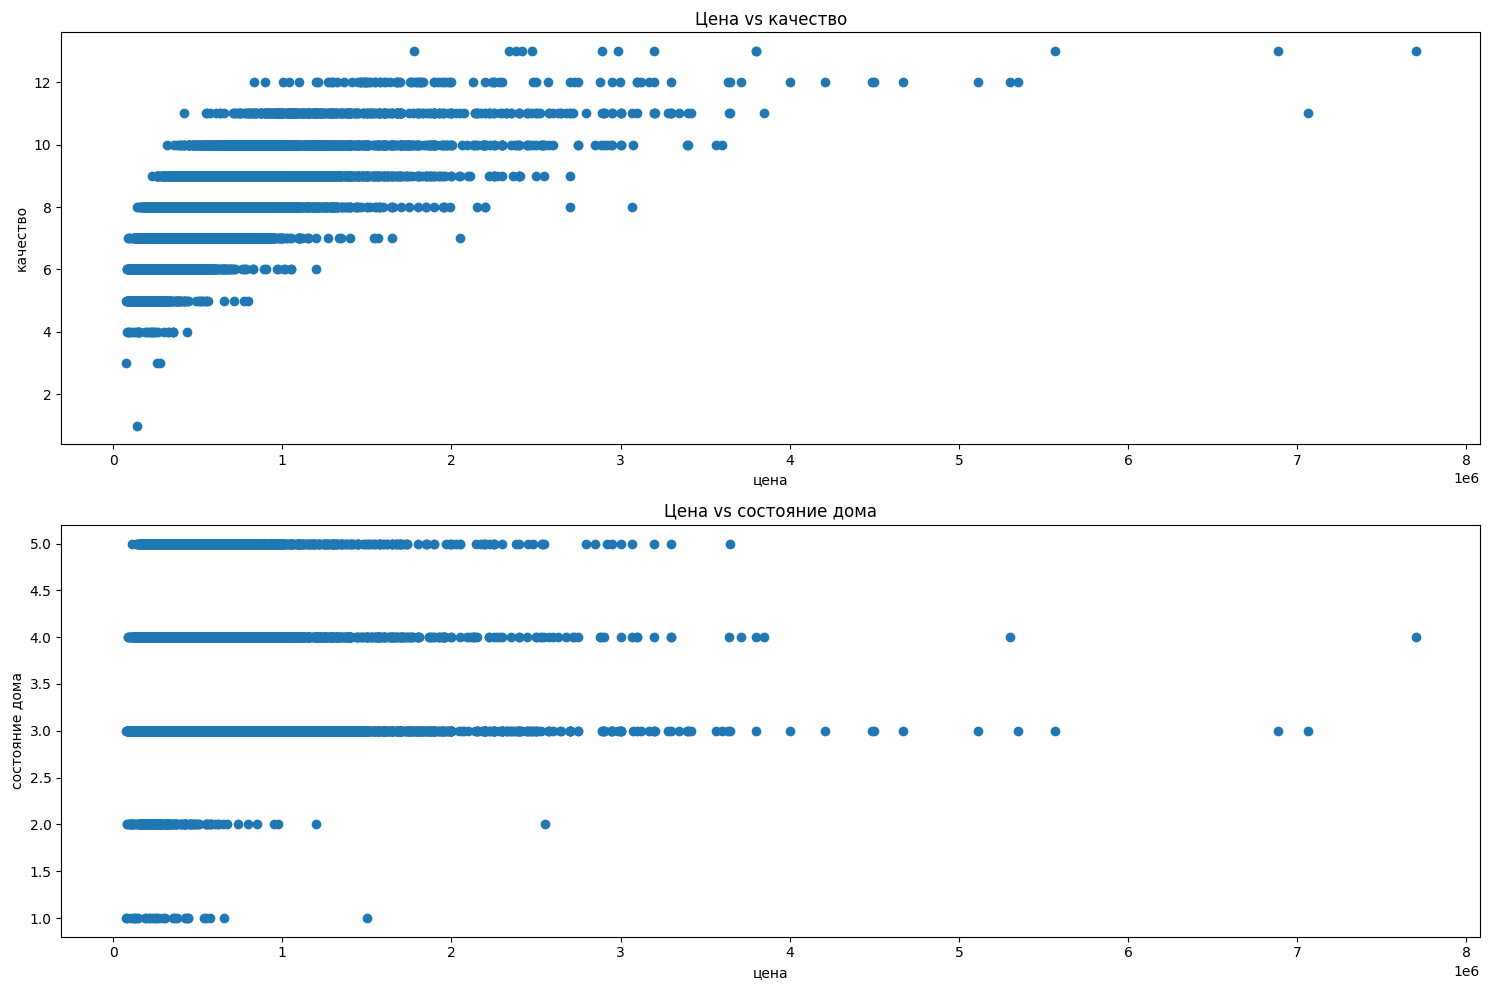

In [861]:
# Проверим, что нулевые значения удалены
plt.figure(figsize=(15, 10))

# Повторная визуализация распределений после удаления нулевых значений
plt.subplot(2, 1, 1)
plt.scatter(df_houses["price"], df_houses["grade"])
plt.xlabel("цена")
plt.ylabel("качество")
plt.title("Цена vs качество")

plt.subplot(2, 1, 2)
plt.scatter(df_houses["price"], df_houses["condition"])
plt.xlabel("цена")
plt.ylabel("состояние дома")
plt.title("Цена vs состояние дома")


plt.tight_layout()
plt.show()

Цена и качество (grade): Наблюдается явная зависимость между ценой дома и его качеством. Более высокие оценки качества (10 и выше) обычно соответствуют более высокой стоимости дома. Это говорит о том, что качество является значимым фактором, влияющим на цену дома, и его следует оставить в модели.

Цена и состояние (condition): Взаимосвязь между состоянием и ценой менее выражена, чем в случае качества. Большинство домов находятся в хорошем или отличном состоянии (оценки 3-5), однако их цена варьируется в широком диапазоне. Это может указывать на то, что состояние дома оказывает меньшее влияние на цену по сравнению с качеством.

### Проблемы выбранного набора данных и их решение


**Зашумлённость данных и выбросы**  

Зашумленные данные могут возникнуть, если параметры, такие как площадь или состояние дома, были оценены неточно.  
Удалим строки с нулевой ценой, площадью участка и жилой площадью, чтобы уменьшить зашумлённость.

Проведя анализ выше мы выяснили, что столбцы zipcode, sqft_living15, sqft_lot15, sqft_lot  могут быть менее полезны, поэтому мы безопасно удалим их, их влияние на цену конкретного дома может быть незначительным.

In [862]:
# Удаление столбцов sqft_living15 и sqft_lot15
df_houses = df_houses.drop(columns=["sqft_living15", "sqft_lot15", "zipcode", "sqft_lot"])

# Проверим, что столбцы удалены
print(df_houses.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long'],
      dtype='object')


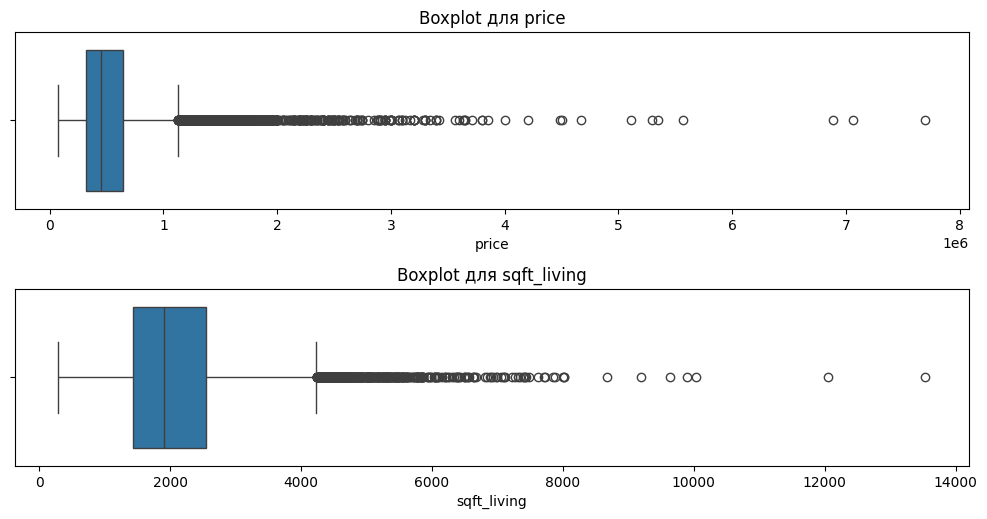

In [863]:
# Построим графики boxplot для обнаружения выбросов
plt.figure(figsize=(10, 10))

# Создание boxplot
for i, column in enumerate(['price', 'sqft_living'], 1):
    plt.subplot(4, 1, i)
    sns.boxplot(x=df_houses[column])
    plt.title(f"Boxplot для {column}")
    
plt.tight_layout()
plt.show()



Выбросы наблюдаются во всех графиках, которые мы построили. Если у определённого параметра много выбросов, то данные могут быть зашумлены или содержат необычные значения, которые стоит анализировать и, возможно, удалить или скорректировать. Графики boxplot помогают визуализировать распределение данных и выявить выбросы, которые находятся за пределами "усов" боксплота.

Попробуем решить устранить проблему выбросов для price и sqft_living. Используется метод усреднения данных для устранения выбросов. Метод стандартных отклонений.

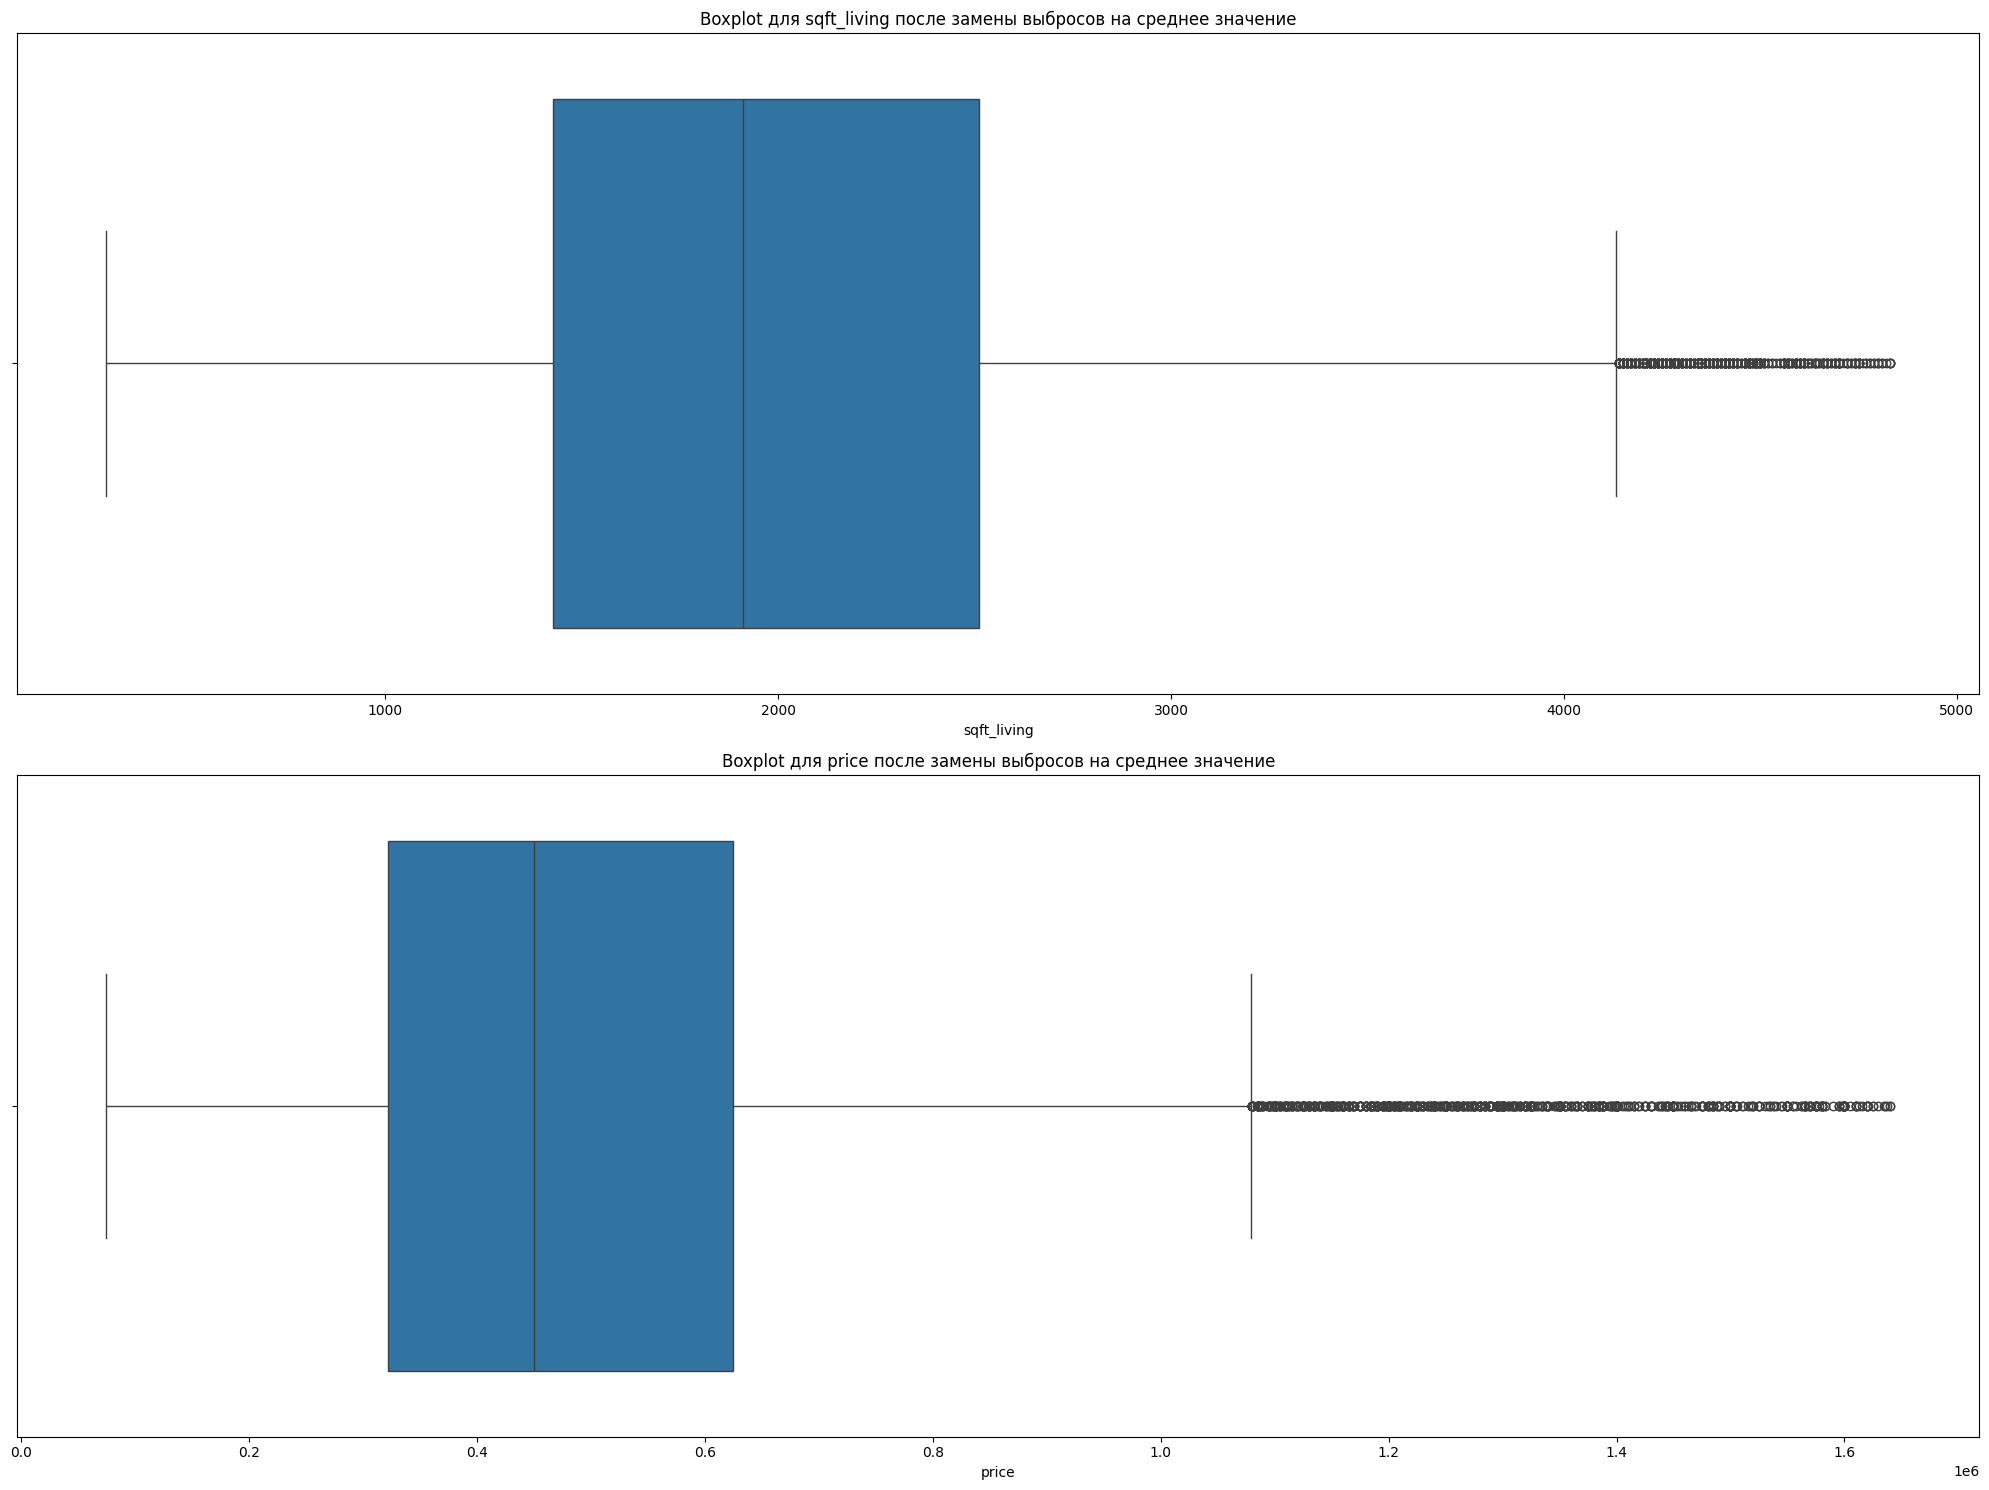

In [864]:
# Вычисление среднего и стандартного отклонения для столбцов
means = df_houses[['sqft_living', 'price']].mean()
std_devs = df_houses[['sqft_living', 'price']].std()

# Определение порога для выбросов (например, 3 стандартных отклонения)
threshold = 3

# Функция для замены выбросов на среднее значение
def replace_outliers_with_mean(column):
    mean_value = column.mean()
    upper_limit = mean_value + threshold * column.std()
    lower_limit = mean_value - threshold * column.std()
    
    return column.where((column >= lower_limit) & (column <= upper_limit), mean_value)

# Применение функции к каждому столбцу
for column in ['sqft_living', 'price']:
    df_houses[column] = replace_outliers_with_mean(df_houses[column])

# Графическое отображение после замены выбросов
plt.figure(figsize=(20, 15))
for i, column in enumerate(['sqft_living', 'price'], 1):
    plt.subplot(2, 1, i)
    sns.boxplot(x=df_houses[column])
    plt.title(f"Boxplot для {column} после замены выбросов на среднее значение")

plt.tight_layout()
plt.show()

**Смещение данных**   

Если дома в выборке представлены неравномерно по различным параметрам (например, есть значительное количество дорогих домов или домов в плохом состоянии), то это может создать смещение в результатах анализа. 

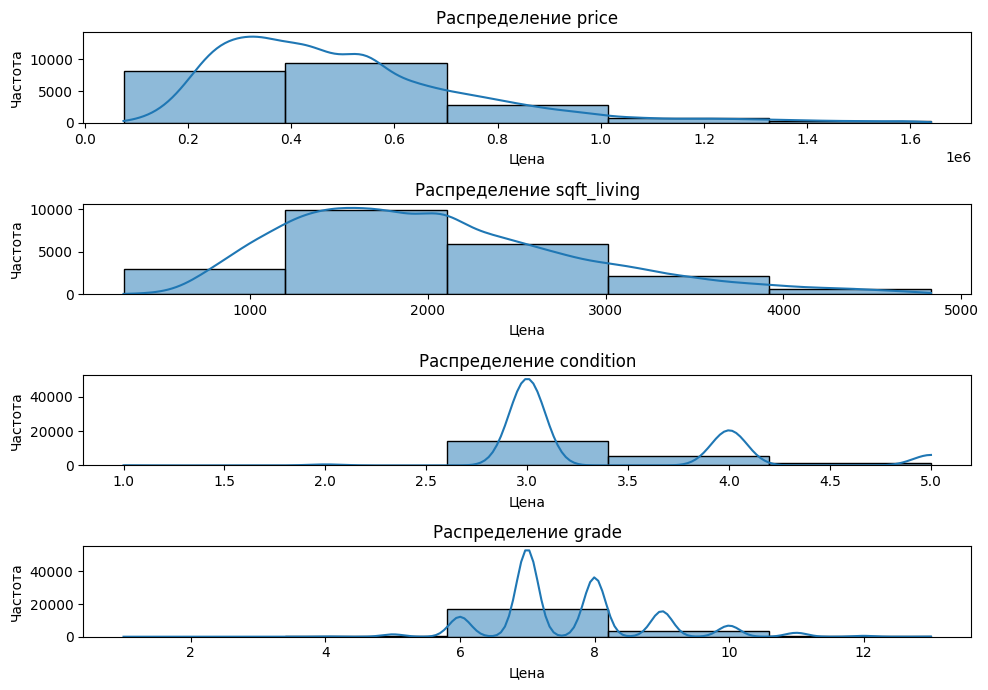

In [865]:
# Построим графики boxplot для обнаружения выбросов
plt.figure(figsize=(10, 7))

# Создание boxplot
for i, column in enumerate(['price', 'sqft_living', 'condition', 'grade'], 1):
    plt.subplot(4, 1, i)
    sns.histplot(df_houses[column], bins=5, kde=True)
    plt.title(f"Распределение {column}")
    plt.xlabel("Цена")
    plt.ylabel("Частота")
    
plt.tight_layout()
plt.show()


Смещение наблюдается к левому краю, но в нашем случае это нормально, и аугментация не требуется.

**Корреляции между признаками** 

Некоторые признаки могут быть сильно скоррелированы между собой, что может снизить качество анализа и обучаемых моделей, если они будут использоваться.

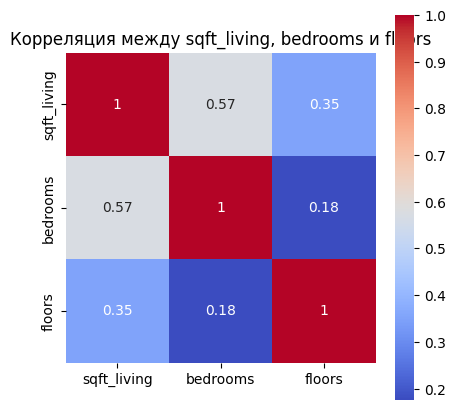

In [866]:
# Выбираем интересующие нас признаки
selected_columns = ['sqft_living', 'bedrooms', 'floors']
correlation_matrix = df_houses[selected_columns].corr()

# Отображаем корреляционную матрицу
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Корреляция между sqft_living, bedrooms и floors")
plt.show()

Умеренная корреляция между sqft_living и bedrooms указывает на то, что связь между этими признаками существует, но они не являются взаимозаменяемыми. Оба признака могут быть полезны для моделей, так как предоставляют дополнительную информацию.
Корреляция между другими парами признаков слишком слаба, чтобы создать риск мультиколлинеарности, поэтому можно оставить все три признака для анализа и построения модели.

**Актуальность данных**

Данные собраны за период с мая 2014 года по май 2015 года. С тех пор рынок недвижимости мог существенно измениться, и такие изменения могут сделать данные устаревшими для современных анализов.

### Разбиение датасета на три части: обучающую, контрольную и тестовую выборки

In [867]:
from sklearn.model_selection import train_test_split

# Выделим признаки (все столбцы, кроме целевого, например "price") и целевой признак (например, "price")
X = df_houses.drop(columns=["price"])  # Признаки (все столбцы, кроме целевого признака 'price')
y = df_houses["price"]  # Целевая переменная (price)

# 1. Разделяем данные на обучающую (60%) и временную (40%) выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# 2. Разделяем временную выборку пополам на контрольную (20%) и тестовую (20%) выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Выводим размеры выборок
print(f"Размер обучающей выборки: {len(X_train)}")
print(f"Размер контрольной выборки: {len(X_val)}")
print(f"Размер тестовой выборки: {len(X_test)}")

Размер обучающей выборки: 12967
Размер контрольной выборки: 4323
Размер тестовой выборки: 4323


### Оценка сбалансированности выборок

Для оценки сбалансированности выборок можно проверить распределение целевой переменной (price) в каждой из них. Мы можем построить гистограммы или использовать базовую статистику, такую как среднее значение и стандартное отклонение, чтобы убедиться, что распределение price в обучающей, валидационной и тестовой выборках примерно одинаково.

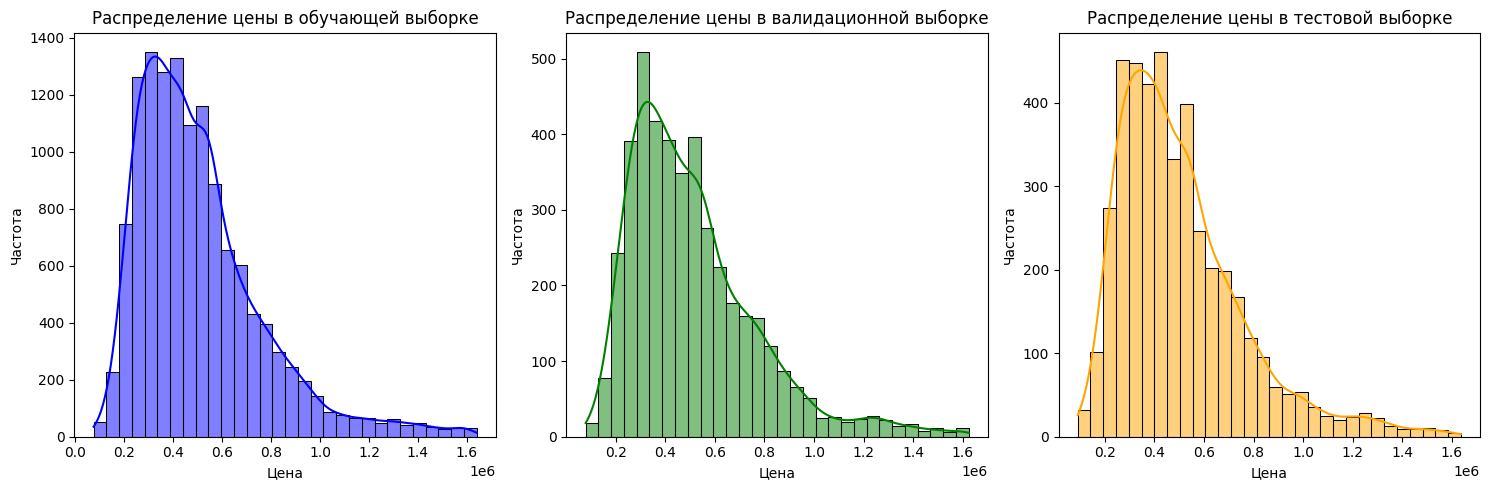

Статистика для обучающей выборки:
count    1.296700e+04
mean     5.071337e+05
std      2.575532e+05
min      7.500000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.205235e+05
max      1.640000e+06
Name: price, dtype: float64

Статистика для валидационной выборки:
count    4.323000e+03
mean     5.099599e+05
std      2.578829e+05
min      7.800000e+04
25%      3.217500e+05
50%      4.500000e+05
75%      6.300000e+05
max      1.625000e+06
Name: price, dtype: float64

Статистика для тестовой выборки:
count    4.323000e+03
mean     5.059874e+05
std      2.540701e+05
min      8.995000e+04
25%      3.235000e+05
50%      4.500000e+05
75%      6.250000e+05
max      1.637500e+06
Name: price, dtype: float64


In [868]:
# Визуализация распределения цены в каждой из выборок
plt.figure(figsize=(15, 5))

# Распределение в обучающей выборке
plt.subplot(1, 3, 1)
sns.histplot(y_train, bins=30, kde=True, color='blue')
plt.title("Распределение цены в обучающей выборке")
plt.xlabel("Цена")
plt.ylabel("Частота")

# Распределение в валидационной выборке
plt.subplot(1, 3, 2)
sns.histplot(y_val, bins=30, kde=True, color='green')
plt.title("Распределение цены в валидационной выборке")
plt.xlabel("Цена")
plt.ylabel("Частота")

# Распределение в тестовой выборке
plt.subplot(1, 3, 3)
sns.histplot(y_test, bins=30, kde=True, color='orange')
plt.title("Распределение цены в тестовой выборке")
plt.xlabel("Цена")
plt.ylabel("Частота")

plt.tight_layout()
plt.show()

# Вывод базовой статистики для каждой выборки
print("Статистика для обучающей выборки:")
print(y_train.describe())
print("\nСтатистика для валидационной выборки:")
print(y_val.describe())
print("\nСтатистика для тестовой выборки:")
print(y_test.describe())


Гистограммы и статистика показыают, что распределения в обучающей, валидационной и тестовой выборках схожи, а значит выборки можно считать сбалансированными.

## 3. Третий набор данных Diamonds Prices (Цены на бриллианты)

Выгрузка данных из CSV файла в датафрейм

In [869]:
# Загрузка данных
df_diamond = pd.read_csv("../../static/csv/Diamonds Prices2022.csv")

# Вывод
print(df_diamond.columns)

print()

df_diamond.info()

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


### Описание набора

В этом документе рассматривается набор данных, содержащий цены и атрибуты приблизительно 54 000 бриллиантов круглой огранки.  
В наборе данных 53 940 бриллиантов с 10 характеристиками (карат, огранка, цвет, чистота, глубина, таблица, цена, x, y и z). Большинство переменных являются числовыми по своей природе, но переменные огранка, цвет и чистота являются упорядоченными факторными переменными со следующими уровнями.
О валюте для столбца цены: этоPrice ($)   
И О столбцах x, y и z они являются измерениями бриллианта как (( x: length in mm, y: width in mm,z: depth in mm))



In [870]:
# Для наглядности
df_diamond.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [871]:
# Описание данных (основные статистические показатели)
df_diamond.describe()

Unnamed: 0         carat         depth         table         price  \
count  53943.000000  53943.000000  53943.000000  53943.000000  53943.000000   
mean   26972.000000      0.797935     61.749322     57.457251   3932.734294   
std    15572.147122      0.473999      1.432626      2.234549   3989.338447   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13486.500000      0.400000     61.000000     56.000000    950.000000   
50%    26972.000000      0.700000     61.800000     57.000000   2401.000000   
75%    40457.500000      1.040000     62.500000     59.000000   5324.000000   
max    53943.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53943.000000  53943.000000  53943.000000  
mean       5.731158      5.734526      3.538730  
std        1.121730      1.142103      0.705679  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

### Получение сведений о пропущенных данных

In [872]:
# Количество пустых значений признаков
df_diamond.isnull().any()

Unnamed: 0    False
carat         False
cut           False
color         False
clarity       False
depth         False
table         False
price         False
x             False
y             False
z             False
dtype: bool

Нет пропущенных данных

### Анализ сведений о наборе данных

**Набор данных:** 

Набор данных содержит 53 940 наблюдений, каждое из которых представляет собой бриллиант с характеристиками, такими как вес (карат), огранка, цвет, прозрачность, глубина, размеры (x, y, z), а также цена.

**Проблемная область:**

Проблемной областью может быть задача оценки стоимости бриллианта на основе его характеристик, что важно для торговли бриллиантами, определения их рыночной стоимости и других бизнес-задач.

**Анализ содержимого**

*Объекты наблюдения:* бриллианты

*Атрибуты объектов:* 

carat — вес   
depth — глубина в бриллианте  
price — цена продажи дома (целевая переменная).    
x,y,z - размеры  
table - площадка  
clarity - прозрачность  

Категориальные характеристики:   

cut - огранка  
color - цвет  


*Связи между объектами:* 
1) Вес и цена: Связь между весом бриллианта (carat, price) и ценой.
2) Качество огранки и цена: Связь между качеством огранки (cut, price) и ценой.
3) Размеры бриллианта и цена: Связь между размером (x, y, z, price) и ценой.


### Бизнес-цель
1.  Автоматизация процесса оценки стоимости бриллианта

    **Цель:** Построить модель для оценки цены бриллианты на основе его характеристик.

    **Эффект:** Улучшение бизнес-процессов (повышение эффективности операционных процессов), повышение доходов, сокращение затрат и улучшение клиентских отношений.  

2.  Оптимизация ассортимента и продаж  

    **Цель:** Построить модель для анализа данных, какие характеристики бриллиантов наиболее востребованы и наилучшим образом влияют на рост продаж. 

    **Эффект:** Компании могут оптимизировать ассортимент на более востребованные, что приведёт к увеличению продаж

### Техническая цель
1.  Разработка модели для оценки стоимости бриллиантов  

    Создать модель машинного обучения, которая на вход получает характеристики бриллианта (вес, огранка, цвет и т.д.) и предсказывает его цену. 
    На вход поступают характеристики, а целевой признак - цена бриллианта.  

2.  Оптимизация ассортимента и прогнозирование спроса 

    Создать модель для предсказания спроса (популярности) определённых категорий бриллиаантов в зависимости от их характеристик. На вход поступают характеристики бриллианта, а целевой признак - показатели продаж или востребованность товара.




### Рассмотрим связь цены с другими признаками.  

1. Вес и цена: Связь между весом бриллианта (carat, price) и ценой.

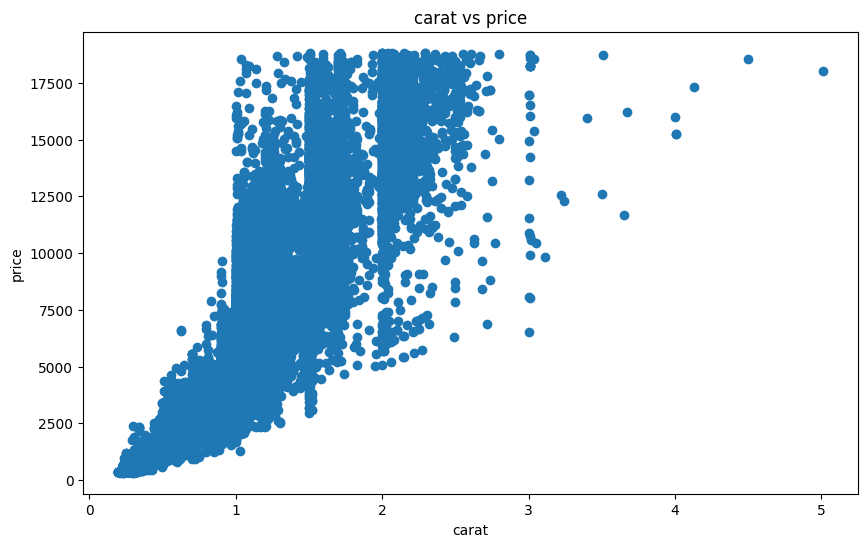

In [873]:
# Визуализируем отношение carat и price
plt.figure(figsize=(10, 6))
plt.scatter(df_diamond["carat"], df_diamond["price"])
plt.xlabel("carat")
plt.ylabel("price")
plt.title("carat vs price")
plt.show()

Вес (карат) оказывает значительное влияние на цену бриллианта, но цена также зависит и от других параметров, которые стоит учесть для более точного анализа.

2. Качество огранки и цена: Связь между качеством огранки (cut, price) и ценой.

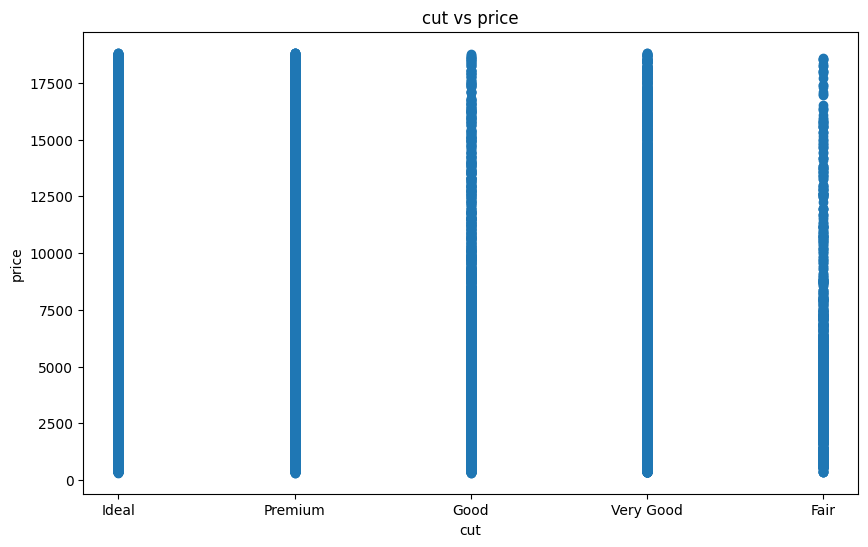

In [874]:
# Визуализируем отношение cut и price
plt.figure(figsize=(10, 6))
plt.scatter(df_diamond["cut"], df_diamond["price"])
plt.xlabel("cut")
plt.ylabel("price")
plt.title("cut vs price")
plt.show()

Качество огранки (cut) может не быть сильным предсказателем цены, по крайней мере, без учета других параметров бриллианта.

3. Размеры бриллианта и цена: Связь между размером (x, y, z, price) и ценой. А также, заодно проверим depth и table

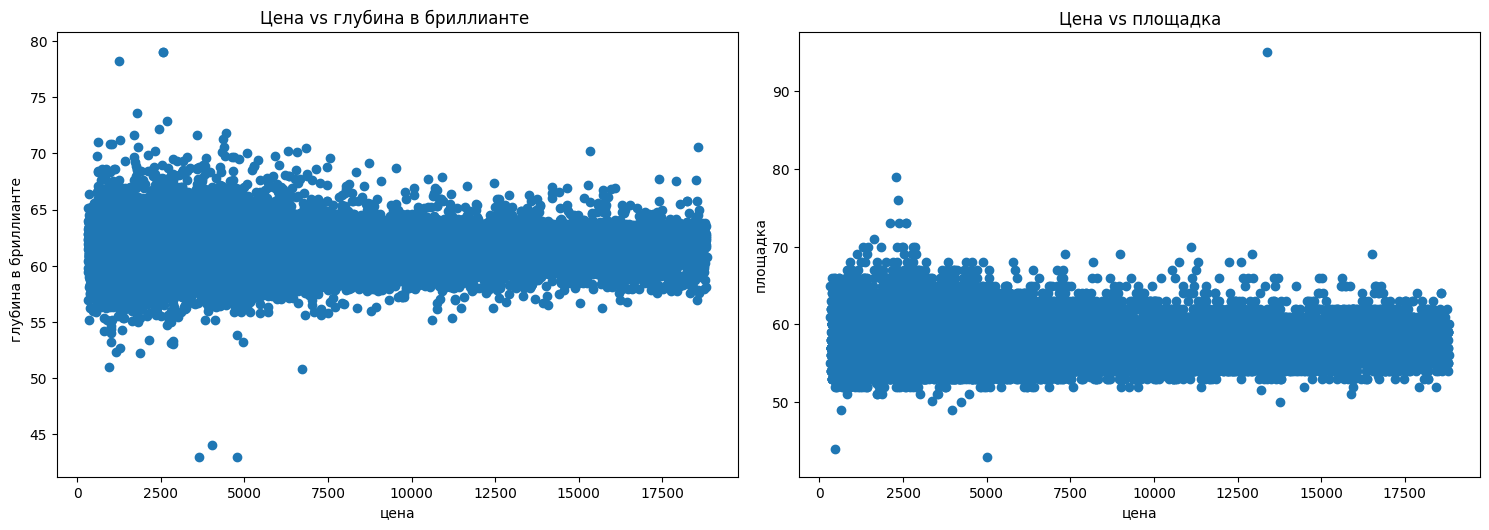

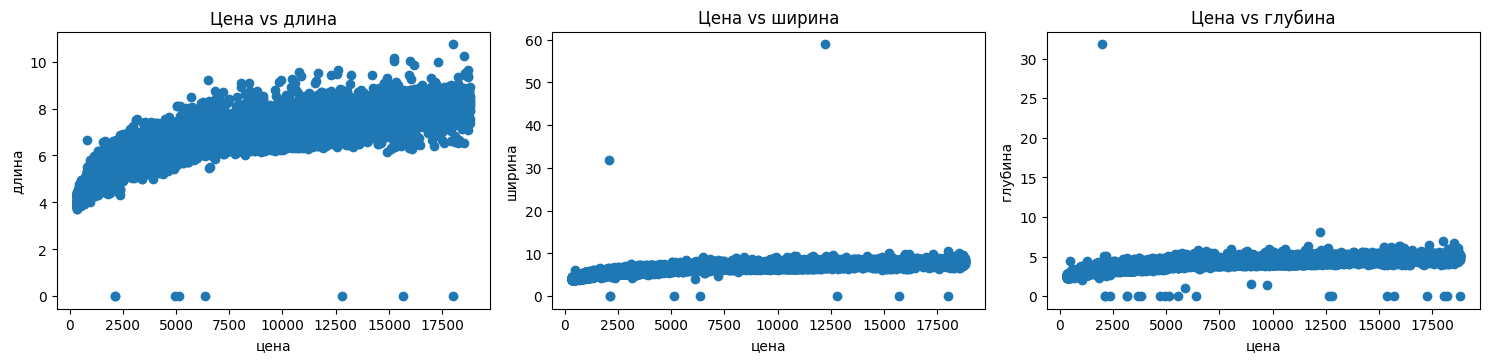

In [875]:
# Проверим, что нулевые значения удалены
plt.figure(figsize=(15, 10))

# Повторная визуализация распределений после удаления нулевых значений
plt.subplot(2, 2, 1)
plt.scatter(df_diamond["price"], df_diamond["depth"])
plt.xlabel("цена")
plt.ylabel("глубина в бриллианте  ")
plt.title("Цена vs глубина в бриллианте ")

plt.subplot(2, 2, 2)
plt.scatter(df_diamond["price"], df_diamond["table"])
plt.xlabel("цена")
plt.ylabel("площадка")
plt.title("Цена vs площадка")

plt.tight_layout()
plt.show()

# Проверим, что нулевые значения удалены
plt.figure(figsize=(15, 10))

# Повторная визуализация распределений после удаления нулевых значений
plt.subplot(3, 3, 1)
plt.scatter(df_diamond["price"], df_diamond["x"])
plt.xlabel("цена")
plt.ylabel("длина")
plt.title("Цена vs длина")

plt.subplot(3, 3, 2)
plt.scatter(df_diamond["price"], df_diamond["y"])
plt.xlabel("цена")
plt.ylabel("ширина")
plt.title("Цена vs ширина")

plt.subplot(3, 3, 3)
plt.scatter(df_diamond["price"], df_diamond["z"])
plt.xlabel("цена")
plt.ylabel("глубина")
plt.title("Цена vs глубина")

plt.tight_layout()
plt.show()

Из представленных диаграмм можно сделать следующие выводы:

Глубина бриллианта (depth) и цена:

На диаграмме "Цена vs глубина в бриллианте" видна слабая связь между ценой и глубиной бриллианта. Значения глубины сосредоточены в диапазоне от 50 до 70, и вариации в этом диапазоне не сильно влияют на цену. Это говорит о том, что глубина может иметь минимальное влияние на предсказание цены и может рассматриваться для исключения.
Площадка (table) и цена:

Диаграмма "Цена vs площадка" также не показывает четкой зависимости между значением площадки и ценой бриллианта. Влияние площадки на цену незначительно, и этот признак, вероятно, не является важным для предсказания цены.
Длина (x), ширина (y), глубина (z) и цена:

Признаки длины, ширины и глубины (x, y, z) показывают более выраженные зависимости с ценой, особенно длина (x), которая, кажется, имеет позитивную корреляцию с ценой. Эти признаки могут быть более полезны для модели.

### Проблемы выбранного набора данных и их решение

**Зашумлённость данных и выбросы**  

Проведя анализ выше мы выяснили, что столбцы depth и table могут быть менее полезны, поэтому мы безопасно удалим их, и их влияние на цену конкретного бриллианта может быть незначительным.

In [876]:
# Удаление столбцов sqft_living15 и sqft_lot15
df_diamond = df_diamond.drop(columns=["depth", "table"])

# Проверим, что столбцы удалены
print(df_diamond.columns)

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'price', 'x', 'y',
       'z'],
      dtype='object')


Также зашумлённость может быть обнаружена через большое количество выбросов (аномальных значений). Выбросы могут выходить за нормальные границы. 

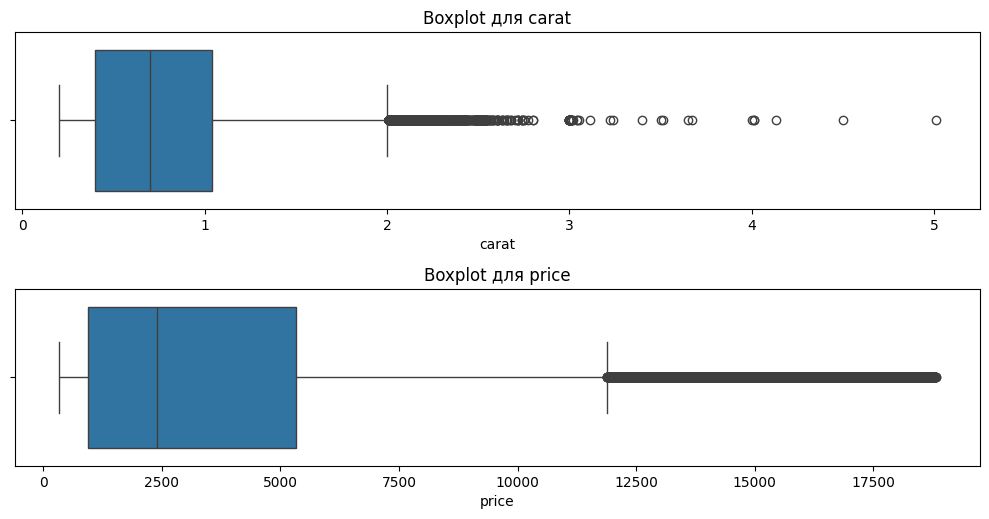

In [877]:
# Построим графики boxplot для обнаружения выбросов
plt.figure(figsize=(10, 10))

# Создание boxplot
for i, column in enumerate(['carat', 'price'], 1):
    plt.subplot(4, 1, i)
    sns.boxplot(x=df_diamond[column])
    plt.title(f"Boxplot для {column}")
    
plt.tight_layout()
plt.show()

Они наблюдаются во всех графиках, которые мы построили. Если у определённого параметра много выбросов, то данные могут быть зашумлены или содержат необычные значения, которые стоит анализировать и, возможно, удалить или скорректировать. Графики boxplot помогают визуализировать распределение данных и выявить выбросы, которые находятся за пределами "усов" боксплота.

Попробуем решить устранить проблему выбросов для price и carat.  Используем метод интерквартильного размаха и заменим их на медиану.

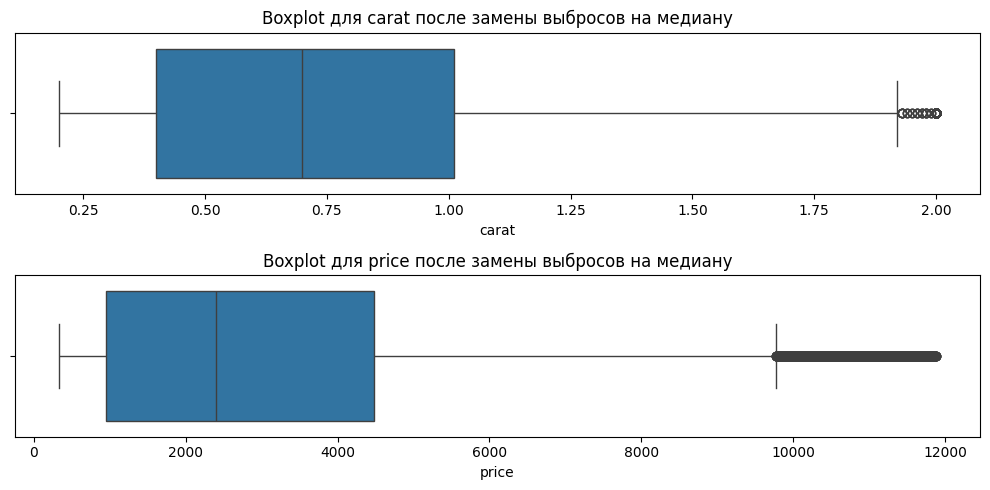

In [878]:
# Вычисление квантилей для каждого столбца
Q1 = df_diamond[['carat', 'price']].quantile(0.25)
Q3 = df_diamond[['carat', 'price']].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Функция для замены выбросов на медианное значение
def replace_outliers_with_median(column):
    median_value = column.median()
    return column.where((column >= lower_bound[column.name]) & (column <= upper_bound[column.name]), median_value)

# Применение функции к каждому столбцу
for column in ['carat', 'price']:
    df_diamond[column] = replace_outliers_with_median(df_diamond[column])

# Графическое отображение после замены выбросов
plt.figure(figsize=(10, 5))
for i, column in enumerate(['carat', 'price'], 1):
    plt.subplot(2, 1, i)
    sns.boxplot(x=df_diamond[column])
    plt.title(f"Boxplot для {column} после замены выбросов на медиану")

plt.tight_layout()
plt.show()

**Актуальность данных**  

Это проблема, которая возникает, когда данные устарели или больше не отражают текущую ситуацию. Это часто встречается в данных о ценах.  

**Просачивание данных**  

Происходит, когда в обучающей выборке присутствует информация, которая не должна быть известна модели на этапе обучения. В данном случае это может происходить, если некоторые переменные, такие как цена, сильно коррелируют с целевым признаком и тем самым искажают результат. Проверка на наличие утечек данных.  

**Смещение в данных**  

Может возникать, если датасет не полностью репрезентативен для реальной популяции бриллиантов. Например, если в датасете больше дешёвых или дорогих бриллиантов, это создаёт смещение в оценке моделей  
Код ниже проверяет данные на распредение признаков и просачивание данных.

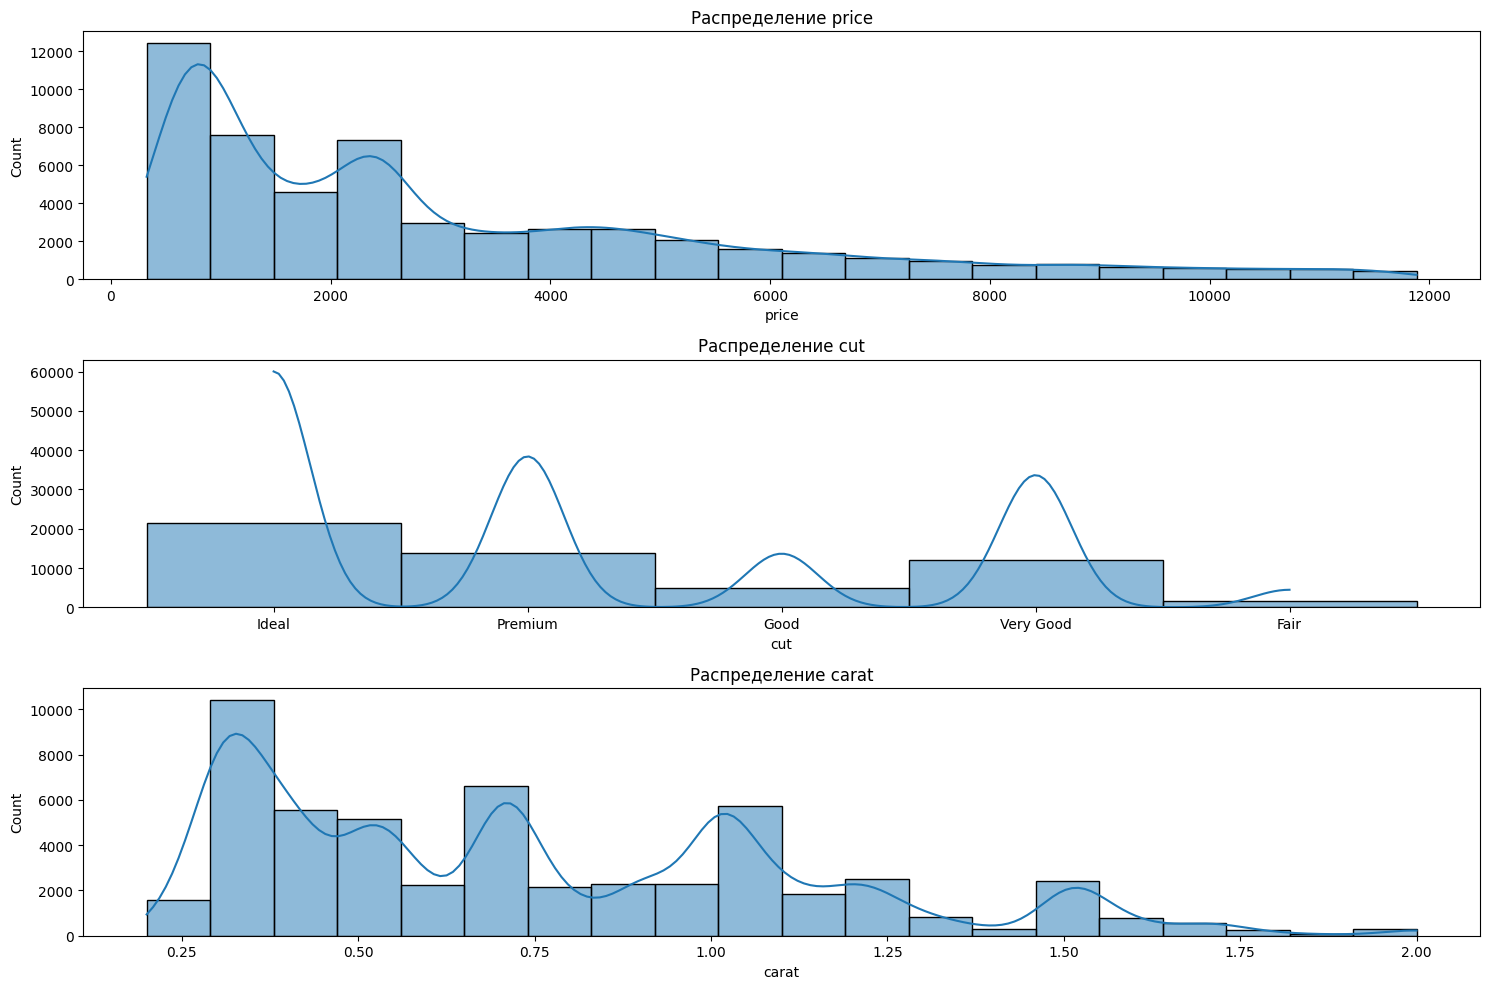

In [879]:
# Проверка распределения признаков
plt.figure(figsize=(15, 10))
for i, column in enumerate(['price', 'cut', 'carat'], 1):
    plt.subplot(3, 1, i)
    sns.histplot(df_diamond[column], bins=20, kde=True)
    plt.title(f"Распределение {column}")
plt.tight_layout()
plt.show()

Для устранения смещения применим рэсемплинг данных, либо же балансировку.

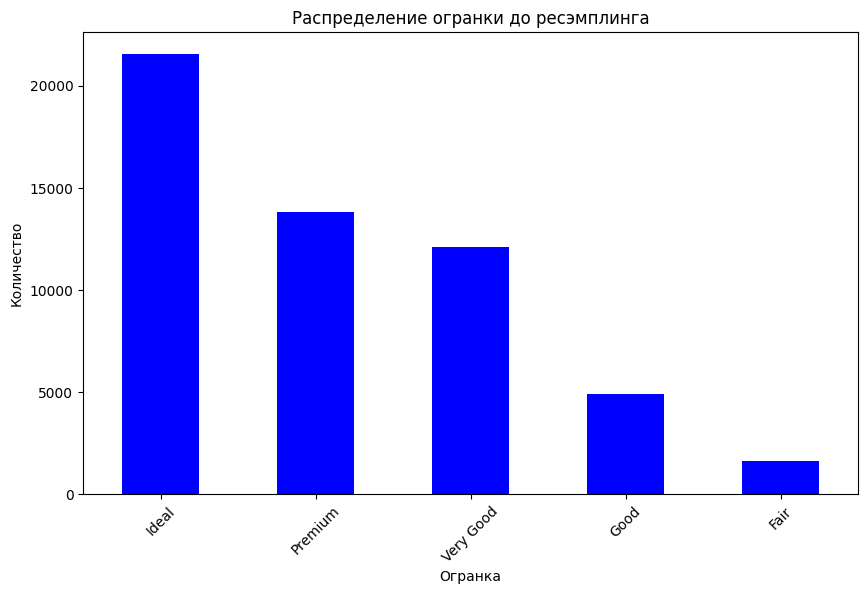

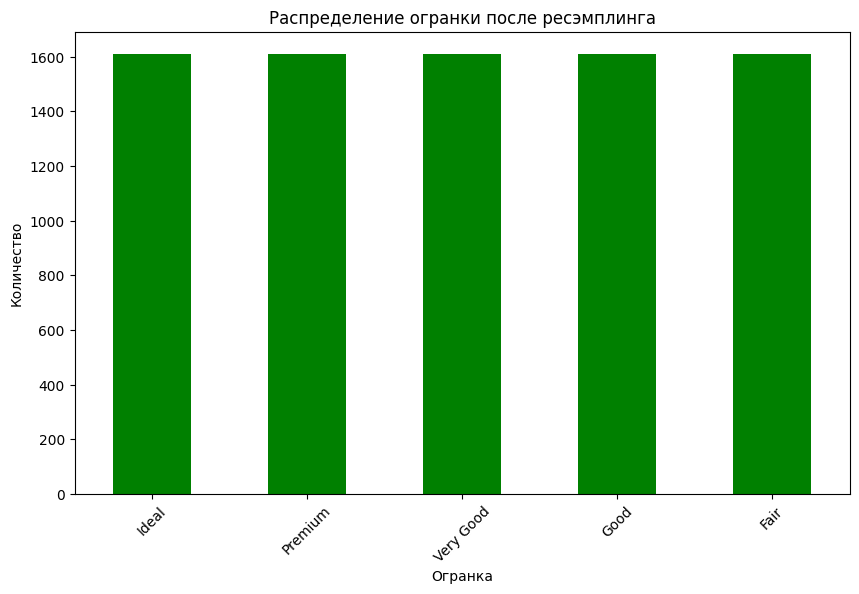

In [880]:
# Балансировка данных. Визуализация до ресэмплинга
plt.figure(figsize=(10, 6))
df_diamond['cut'].value_counts().plot(kind='bar', color='blue')
plt.title('Распределение огранки до ресэмплинга')
plt.xlabel('Огранка')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

# Пример ресэмплинга
brand_counts = df_diamond['cut'].value_counts()
min_count = brand_counts.min()
balanced_data = pd.concat([df_diamond[df_diamond['cut'] == brand].sample(min_count) for brand in brand_counts.index])

# Визуализация после ресэмплинга
plt.figure(figsize=(10, 6))
balanced_data['cut'].value_counts().plot(kind='bar', color='green')
plt.title('Распределение огранки после ресэмплинга')
plt.xlabel('Огранка')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

Рэсемплинг данных позволил нам изменить размер выборки, чтобы достичь более сбалансированного распределения классов, чтобы повысить общую эффективность анализа данных. Устанили перекос (дисбаланс) данных и добились более равномерного распределения огранок.

### Разбиение датасета на три части: обучающую, контрольную и тестовую выборки

In [881]:
from sklearn.model_selection import train_test_split

# Выделим признаки (все столбцы, кроме целевого, например "price") и целевой признак (например, "price")
X = df_diamond.drop(columns=["price"])  # Признаки (все столбцы, кроме целевого признака 'price')
y = df_diamond["price"]  # Целевая переменная (price)

# 1. Разделяем данные на обучающую (60%) и временную (40%) выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# 2. Разделяем временную выборку пополам на контрольную (20%) и тестовую (20%) выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Выводим размеры выборок
print(f"Размер обучающей выборки: {len(X_train)}")
print(f"Размер контрольной выборки: {len(X_val)}")
print(f"Размер тестовой выборки: {len(X_test)}")

Размер обучающей выборки: 32365
Размер контрольной выборки: 10789
Размер тестовой выборки: 10789


### Оценка сбалансированности выборок

Для оценки сбалансированности выборок можно проверить распределение целевой переменной (price) в каждой из них. Мы можем построить гистограммы или использовать базовую статистику, такую как среднее значение и стандартное отклонение, чтобы убедиться, что распределение price в обучающей, валидационной и тестовой выборках примерно одинаково.

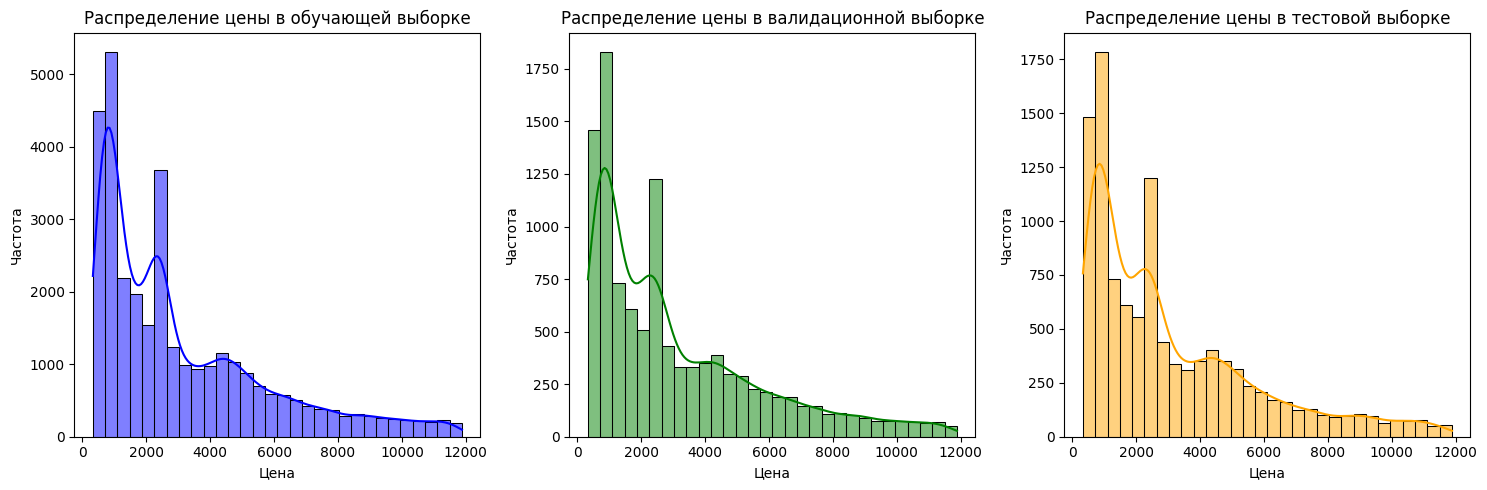

Статистика для обучающей выборки:
count    32365.000000
mean      3116.224471
std       2691.916703
min        327.000000
25%        954.000000
50%       2399.000000
75%       4497.000000
max      11880.000000
Name: price, dtype: float64

Статистика для валидационной выборки:
count    10789.000000
mean      3105.240430
std       2666.332966
min        326.000000
25%        942.000000
50%       2401.000000
75%       4455.000000
max      11883.000000
Name: price, dtype: float64

Статистика для тестовой выборки:
count    10789.000000
mean      3094.410140
std       2652.622648
min        335.000000
25%        956.000000
50%       2401.000000
75%       4455.000000
max      11883.000000
Name: price, dtype: float64


In [882]:
# Визуализация распределения цены в каждой из выборок
plt.figure(figsize=(15, 5))

# Распределение в обучающей выборке
plt.subplot(1, 3, 1)
sns.histplot(y_train, bins=30, kde=True, color='blue')
plt.title("Распределение цены в обучающей выборке")
plt.xlabel("Цена")
plt.ylabel("Частота")

# Распределение в валидационной выборке
plt.subplot(1, 3, 2)
sns.histplot(y_val, bins=30, kde=True, color='green')
plt.title("Распределение цены в валидационной выборке")
plt.xlabel("Цена")
plt.ylabel("Частота")

# Распределение в тестовой выборке
plt.subplot(1, 3, 3)
sns.histplot(y_test, bins=30, kde=True, color='orange')
plt.title("Распределение цены в тестовой выборке")
plt.xlabel("Цена")
plt.ylabel("Частота")

plt.tight_layout()
plt.show()

# Вывод базовой статистики для каждой выборки
print("Статистика для обучающей выборки:")
print(y_train.describe())
print("\nСтатистика для валидационной выборки:")
print(y_val.describe())
print("\nСтатистика для тестовой выборки:")
print(y_test.describe())


После того как мы оценили сбалансированность, можем решить, нужно ли использовать методы аугментации данных. Например, если одна из категорий в 'cut' значительно меньше других, это может потребовать применения oversampling или undersampling.

Размер обучающей выборки: 32365
Размер валидационной выборки: 10789
Размер тестовой выборки: 10789
Unnamed: 0      int64
carat         float64
cut           float64
color         float64
clarity       float64
x             float64
y             float64
z             float64
dtype: object


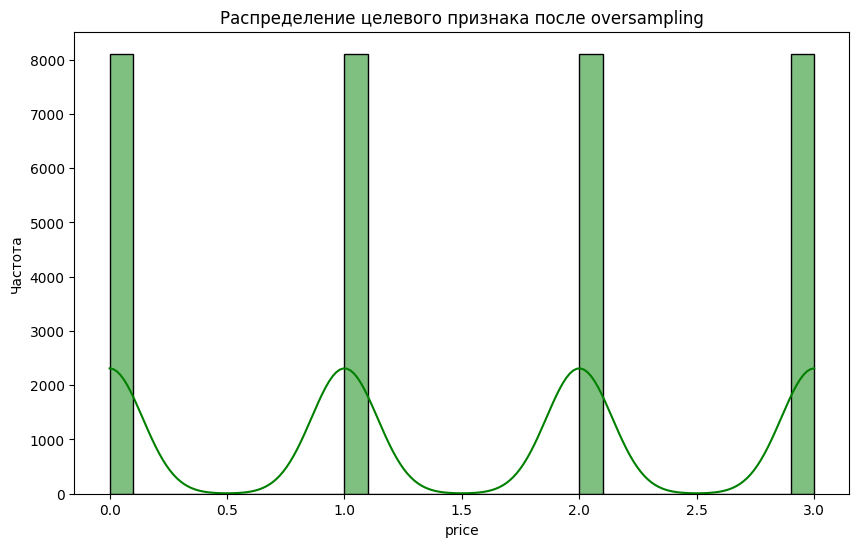

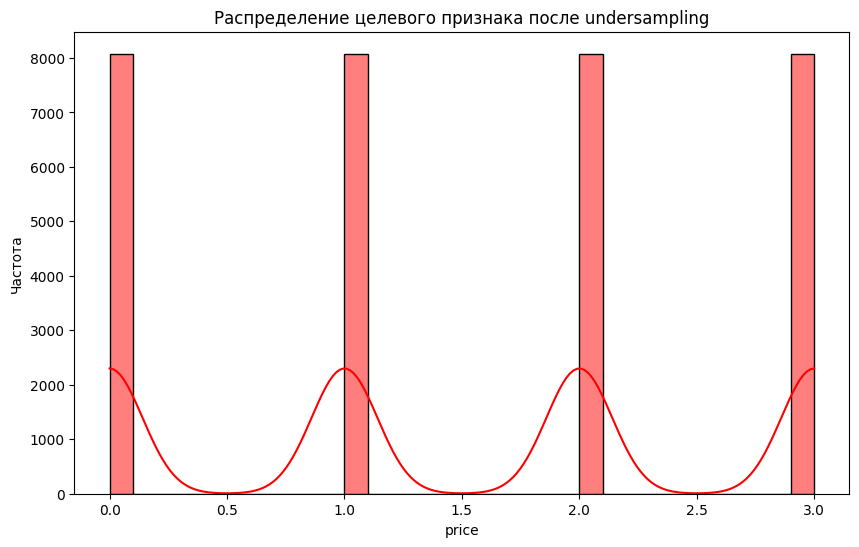

Количество записей в обучающей выборке до аугментации: 32365
Количество записей в обучающей выборке после oversampling: 32440
Количество записей в обучающей выборке после undersampling: 32308


In [886]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Разделение признаков и целевой переменной
X = df_diamond.drop(columns=['price'])  # Признаки
y = df_diamond['price']  # Целевая переменная (для регрессии)

# Разбиение данных на обучающую, контрольную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Размер обучающей выборки: {len(X_train)}")
print(f"Размер валидационной выборки: {len(X_val)}")
print(f"Размер тестовой выборки: {len(X_test)}")

# Все типы к числовым приводим
X_train = X_train.apply(pd.to_numeric, errors='coerce')
print(X_train.dtypes)

# Квантилизация целевой переменной для создания категорий
y_train_cat = pd.qcut(y_train, q=4, labels=False)

# Объединяем исходные данные и "шумные" данные для увеличения обучающей выборки
X_train_combined = np.vstack([X_train, X_train])
y_train_combined = np.hstack([y_train, y_train])  # Убедитесь, что y_train повторяется для новых данных

# Применение oversampling и undersampling
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train_cat)

# Проверка распределения после oversampling
plt.figure(figsize=(10, 6))
sns.histplot(y_train_ros, bins=30, kde=True, color='green')
plt.title('Распределение целевого признака после oversampling')
plt.xlabel('price')
plt.ylabel('Частота')
plt.show()

# Применение RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train_cat)

# Проверка распределения после undersampling
plt.figure(figsize=(10, 6))
sns.histplot(y_train_rus, bins=30, kde=True, color='red')
plt.title('Распределение целевого признака после undersampling')
plt.xlabel('price')
plt.ylabel('Частота')
plt.show()

# Вывод количества данных до и после аугментации
print(f"Количество записей в обучающей выборке до аугментации: {len(y_train)}")
print(f"Количество записей в обучающей выборке после oversampling: {len(y_train_ros)}")
print(f"Количество записей в обучающей выборке после undersampling: {len(y_train_rus)}")

Набор данных, судя по числам, был относительно сбалансирован, и применение oversampling/undersampling не сильно изменил размер выборок. Использование RandomOverSampler и RandomUnderSampler для регрессионных задач не является оптимальным решением, поскольку эти методы предназначены для классификации.

Таким образом, мы проанализировали 3 датасета. Посмотрели какие проблемы с ними могут быть связаны, возможные пути их решения. 
Разбили выборки, далее их сбалансировали, с помощью методов OverSampling и UnderSampling. Методы oversampling и undersampling лучше использовать для задач классификации, где целевая переменная — дискретные классы. Для регрессионных задач эти методы напрямую не применимы. Методы аугментации данных для регрессии, такие как SMOTE для регрессии, могут также помочь в увеличении количества обучающих данных и улучшении качества модели.